In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data.shape  # 1599 * 11  

(1599, 12)

In [181]:
raw_data.dropna().shape

(1599, 12)

In [182]:
label_count = list(set(raw_data.iloc[:,-1]))  # {3,4,5,6,7,8}

In [183]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Task: we have given 11 features of a Wine with their quality. We have to find which features are good for good wine quality. i.e if the quality of some wine is greater then the threshold value it means that features are good otherwise bad

# 1. Preprocessing

In [184]:
cut = int(raw_data.shape[0]*.75)

train_data = raw_data.iloc[:cut,:]
train_features = train_data.iloc[:,:-1]
train_labels = train_data['quality']
train_features_columns = train_features.columns

test_data = raw_data.iloc[cut:,:]
test_features = test_data.iloc[:,:-1]
test_labels = test_data['quality']
test_features_columns = test_features.columns


# 2. Normalizing

In [185]:
#train_features = (train_features   / (np.mean(train_features))) 
test_features = (test_features / np.mean(test_features)) 

# 3. One Hot Encoding

In [186]:
train_labels_hot_encode = pd.get_dummies(train_labels)
test_labels_hot_encode = pd.get_dummies(test_labels)

<IPython.core.display.Javascript object>


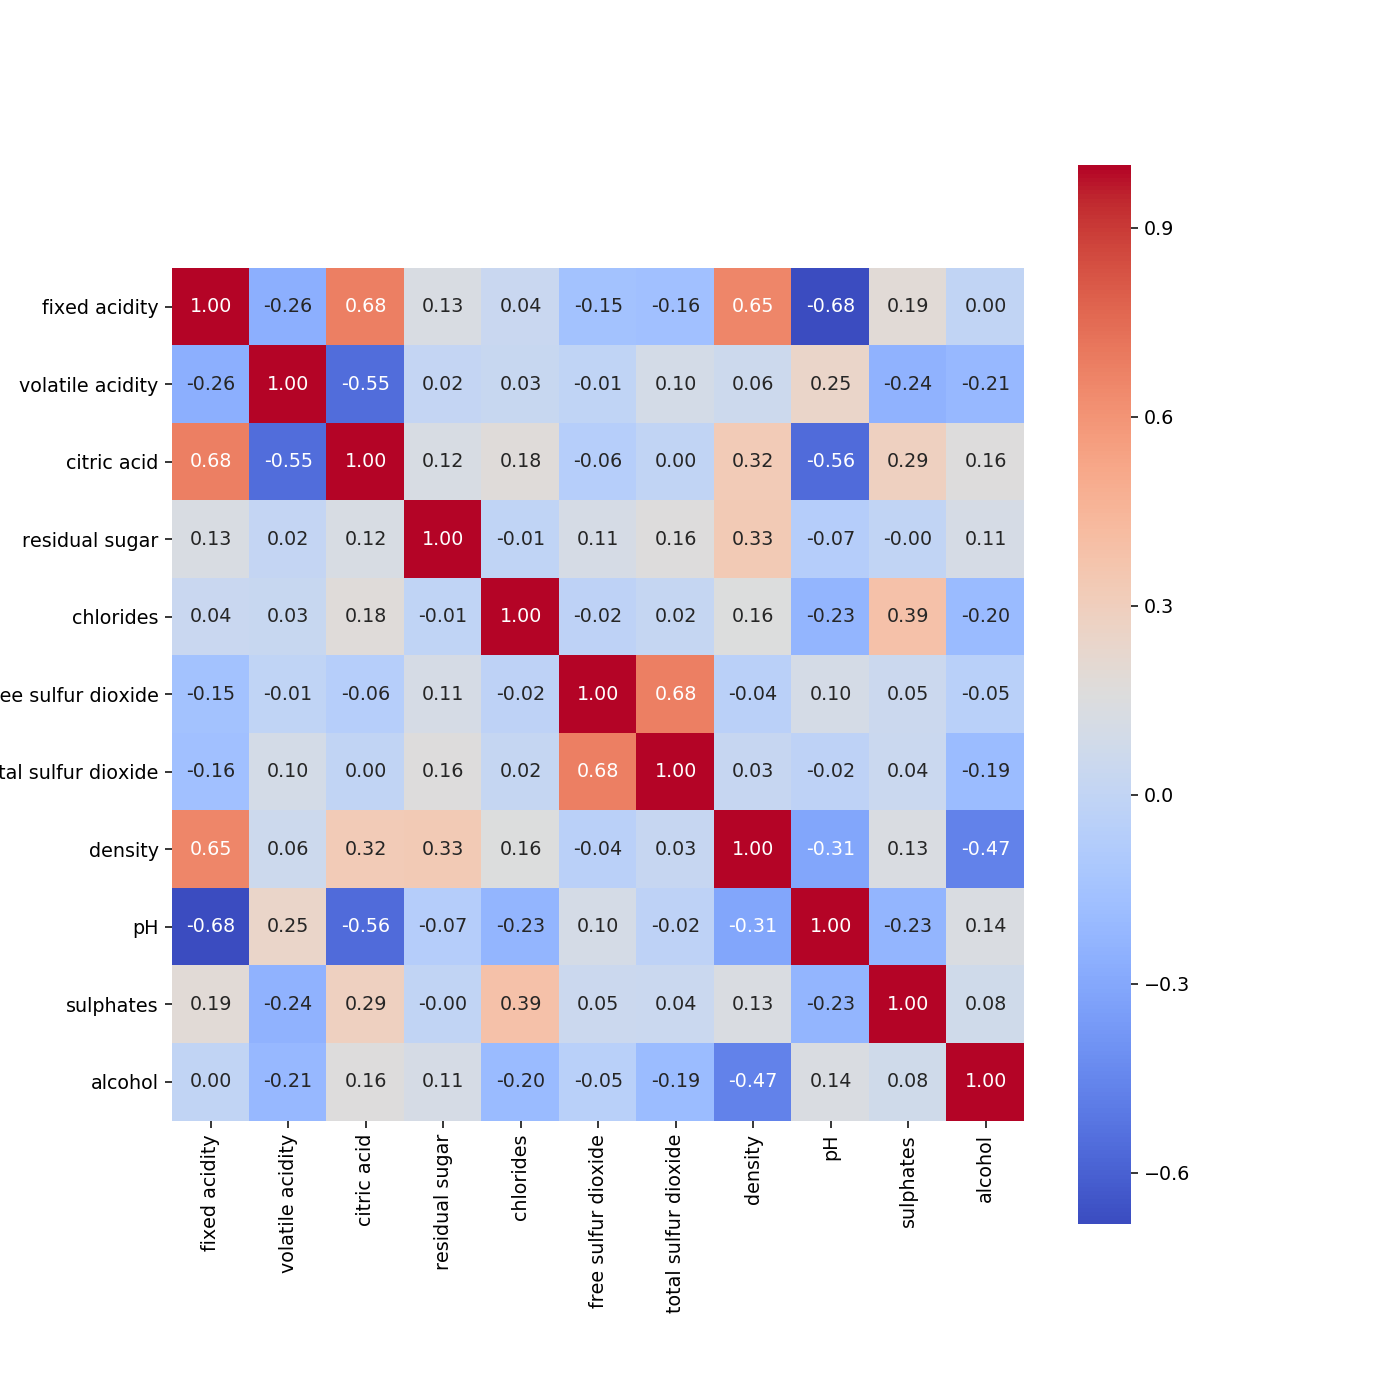

In [187]:
plt.figure(figsize=(10,10))
sns.heatmap(train_features.corr() ,square=True ,  annot=True , fmt='.2f' ,cmap='coolwarm')
plt.show()

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


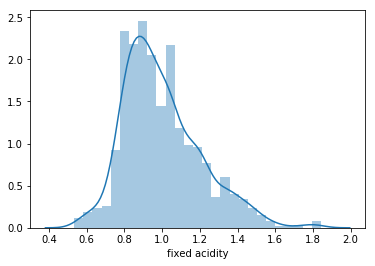

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


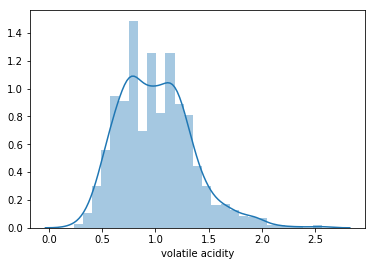

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


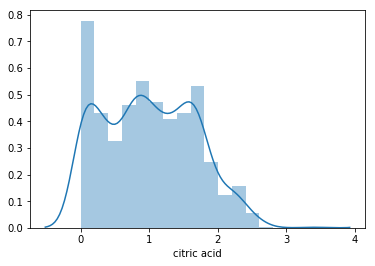

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


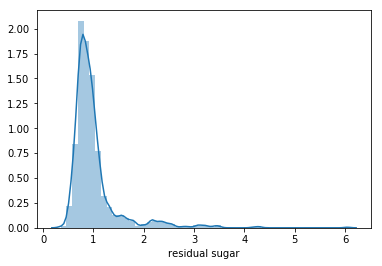

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


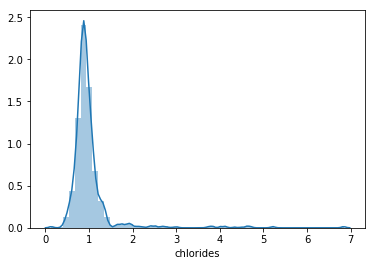

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


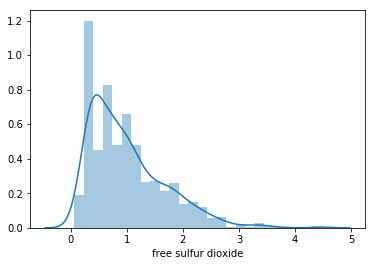

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


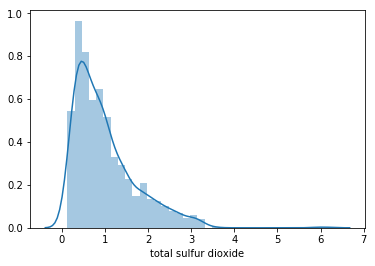

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


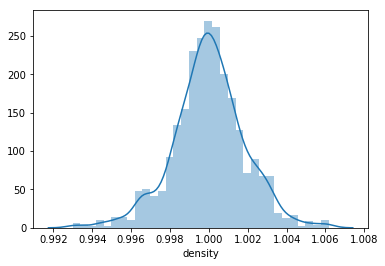

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


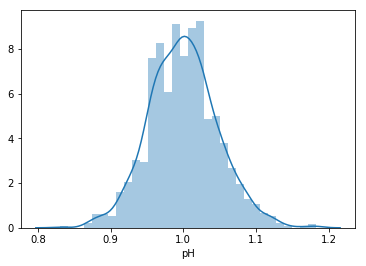

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


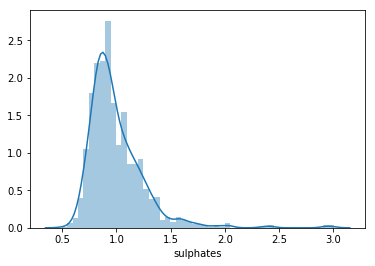

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


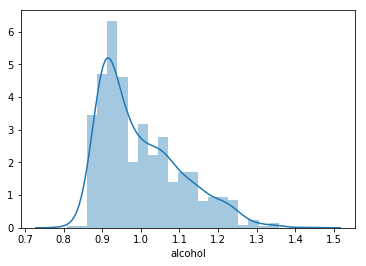

In [11]:
for i in train_features:
    sns.distplot(train_features[i])
    plt.show()

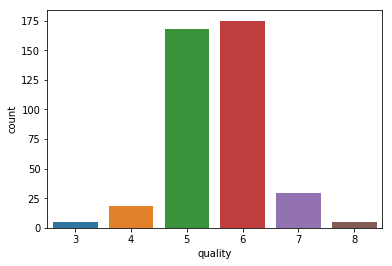

In [12]:
sns.countplot(test_labels)

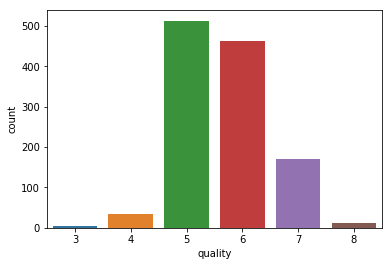

In [13]:
sns.countplot(train_labels)

# approx. both have same amount of data

softmax function: $$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$



$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

In [188]:
def softmax(theta0 , theta , features):
    exp = np.exp(theta0 + np.dot(features , theta))  # observation * labels 1 columns for each decision boundary    
    sum_denominator = np.sum((exp) , axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator ,  np.arange(len(label_count))))
    return np.array(s).T  # observation * labels = probability of each value in their class wise

def cost_function(theta0 , theta , features , labels):
    return -(np.sum(np.matmul( np.log(softmax(theta0 , theta , features)).T  , labels )) / features.shape[0])
    

In [189]:
alpha = 0.01
epsilon = 0.00001

initial_theta0 = np.random.randn(1 , len(label_count))  # 1 * no. of labels 1 theta for each class
initial_theta = np.random.randn(train_features.shape[1] , len(label_count))  # features * labels 

i = 1
itera = []
fc = []

while True:
    del_theta0 = (np.sum(softmax(initial_theta0 , initial_theta , train_features)  - np.array(train_labels_hot_encode) , axis=0)) / train_features.shape[0]
    del_theta = (np.sum(np.matmul(train_features.T ,(softmax(initial_theta0 , initial_theta , train_features)  - np.array(train_labels_hot_encode)) ))) / train_features.shape[0]
    
    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta  = initial_theta - alpha  * del_theta

    initial_cost = cost_function(initial_theta0 , initial_theta , train_features , train_labels_hot_encode)
    final_cost   = cost_function(final_theta0 , final_theta , train_features , train_labels_hot_encode)

    print('{} Average Negative Log : {}'.format(i , final_cost))
    i+=1
    itera.append(i)
    fc.append(final_cost)
    initial_theta0 = final_theta0
    initial_theta = final_theta
    if(abs(final_cost - initial_cost)) < epsilon:
        break
    


1 Average Negative Log : 172.90684918219074
2 Average Negative Log : 172.89056692149455
3 Average Negative Log : 172.87429328972777
4 Average Negative Log : 172.85802828775434
5 Average Negative Log : 172.84177191643968
6 Average Negative Log : 172.82552417665116
7 Average Negative Log : 172.8092850692574
8 Average Negative Log : 172.79305459512872
9 Average Negative Log : 172.77683275513644
10 Average Negative Log : 172.76061955015308
11 Average Negative Log : 172.74441498105188
12 Average Negative Log : 172.72821904870707
13 Average Negative Log : 172.7120317539934
14 Average Negative Log : 172.69585309778586
15 Average Negative Log : 172.6796830809601
16 Average Negative Log : 172.66352170439163
17 Average Negative Log : 172.6473689689561
18 Average Negative Log : 172.63122487552886
19 Average Negative Log : 172.61508942498506
20 Average Negative Log : 172.59896261819932
21 Average Negative Log : 172.58284445604568
22 Average Negative Log : 172.5667349393973
23 Average Negative Log 

258 Average Negative Log : 169.00777189282525
259 Average Negative Log : 168.9937201584912
260 Average Negative Log : 168.97967705519505
261 Average Negative Log : 168.96564258190313
262 Average Negative Log : 168.95161673757937
263 Average Negative Log : 168.93759952118523
264 Average Negative Log : 168.9235909316797
265 Average Negative Log : 168.90959096801947
266 Average Negative Log : 168.89559962915928
267 Average Negative Log : 168.88161691405153
268 Average Negative Log : 168.86764282164674
269 Average Negative Log : 168.8536773508936
270 Average Negative Log : 168.83972050073893
271 Average Negative Log : 168.8257722701279
272 Average Negative Log : 168.81183265800405
273 Average Negative Log : 168.79790166330932
274 Average Negative Log : 168.78397928498444
275 Average Negative Log : 168.77006552196855
276 Average Negative Log : 168.7561603731998
277 Average Negative Log : 168.742263837615
278 Average Negative Log : 168.72837591414998
279 Average Negative Log : 168.7144966017

470 Average Negative Log : 166.22022910240162
471 Average Negative Log : 166.2079843762062
472 Average Negative Log : 166.195748068252
473 Average Negative Log : 166.18352017744317
474 Average Negative Log : 166.17130070267967
475 Average Negative Log : 166.15908964285714
476 Average Negative Log : 166.14688699686675
477 Average Negative Log : 166.13469276359518
478 Average Negative Log : 166.12250694192454
479 Average Negative Log : 166.11032953073254
480 Average Negative Log : 166.09816052889218
481 Average Negative Log : 166.08599993527176
482 Average Negative Log : 166.07384774873506
483 Average Negative Log : 166.0617039681411
484 Average Negative Log : 166.04956859234412
485 Average Negative Log : 166.0374416201935
486 Average Negative Log : 166.0253230505341
487 Average Negative Log : 166.01321288220558
488 Average Negative Log : 166.00111111404286
489 Average Negative Log : 165.989017744876
490 Average Negative Log : 165.97693277353014
491 Average Negative Log : 165.96485619882

662 Average Negative Log : 164.02205861442513
663 Average Negative Log : 164.01140461927136
664 Average Negative Log : 164.00075875330285
665 Average Negative Log : 163.9901210148427
666 Average Negative Log : 163.97949140221604
667 Average Negative Log : 163.9688699137498
668 Average Negative Log : 163.95825654777315
669 Average Negative Log : 163.9476513026172
670 Average Negative Log : 163.93705417661528
671 Average Negative Log : 163.92646516810285
672 Average Negative Log : 163.91588427541765
673 Average Negative Log : 163.9053114968995
674 Average Negative Log : 163.89474683089063
675 Average Negative Log : 163.88419027573568
676 Average Negative Log : 163.87364182978146
677 Average Negative Log : 163.86310149137722
678 Average Negative Log : 163.85256925887478
679 Average Negative Log : 163.84204513062815
680 Average Negative Log : 163.83152910499402
681 Average Negative Log : 163.8210211803316
682 Average Negative Log : 163.8105213550025
683 Average Negative Log : 163.800029627

854 Average Negative Log : 162.12371556016774
855 Average Negative Log : 162.11459359151527
856 Average Negative Log : 162.10547944443329
857 Average Negative Log : 162.09637311691625
858 Average Negative Log : 162.087274606947
859 Average Negative Log : 162.07818391249688
860 Average Negative Log : 162.06910103152535
861 Average Negative Log : 162.06002596198024
862 Average Negative Log : 162.05095870179738
863 Average Negative Log : 162.04189924890053
864 Average Negative Log : 162.03284760120135
865 Average Negative Log : 162.02380375659934
866 Average Negative Log : 162.01476771298144
867 Average Negative Log : 162.00573946822243
868 Average Negative Log : 161.99671902018426
869 Average Negative Log : 161.98770636671654
870 Average Negative Log : 161.97870150565578
871 Average Negative Log : 161.9697044348259
872 Average Negative Log : 161.96071515203795
873 Average Negative Log : 161.95173365508975
874 Average Negative Log : 161.94275994176604
875 Average Negative Log : 161.933794

1059 Average Negative Log : 160.4134211211856
1060 Average Negative Log : 160.40584064836224
1061 Average Negative Log : 160.39826729445554
1062 Average Negative Log : 160.3907010548759
1063 Average Negative Log : 160.3831419250295
1064 Average Negative Log : 160.37558990031735
1065 Average Negative Log : 160.36804497613616
1066 Average Negative Log : 160.36050714787842
1067 Average Negative Log : 160.35297641093203
1068 Average Negative Log : 160.3454527606808
1069 Average Negative Log : 160.33793619250457
1070 Average Negative Log : 160.33042670177917
1071 Average Negative Log : 160.32292428387646
1072 Average Negative Log : 160.31542893416488
1073 Average Negative Log : 160.30794064800887
1074 Average Negative Log : 160.30045942076964
1075 Average Negative Log : 160.29298524780486
1076 Average Negative Log : 160.285518124469
1077 Average Negative Log : 160.2780580461133
1078 Average Negative Log : 160.2706050080859
1079 Average Negative Log : 160.263159005732
1080 Average Negative L

1265 Average Negative Log : 158.99548407428983
1266 Average Negative Log : 158.98927230236055
1267 Average Negative Log : 158.98306670521688
1268 Average Negative Log : 158.97686727841545
1269 Average Negative Log : 158.97067401751227
1270 Average Negative Log : 158.96448691806293
1271 Average Negative Log : 158.95830597562258
1272 Average Negative Log : 158.95213118574557
1273 Average Negative Log : 158.94596254398576
1274 Average Negative Log : 158.93980004589628
1275 Average Negative Log : 158.9336436870295
1276 Average Negative Log : 158.92749346293698
1277 Average Negative Log : 158.9213493691695
1278 Average Negative Log : 158.91521140127685
1279 Average Negative Log : 158.9090795548079
1280 Average Negative Log : 158.90295382531053
1281 Average Negative Log : 158.89683420833165
1282 Average Negative Log : 158.89072069941696
1283 Average Negative Log : 158.88461329411103
1284 Average Negative Log : 158.87851198795727
1285 Average Negative Log : 158.8724167764978
1286 Average Nega

1465 Average Negative Log : 157.87003740344278
1466 Average Negative Log : 157.86496907882417
1467 Average Negative Log : 157.8599059870113
1468 Average Negative Log : 157.85484812296576
1469 Average Negative Log : 157.84979548164725
1470 Average Negative Log : 157.84474805801312
1471 Average Negative Log : 157.83970584701873
1472 Average Negative Log : 157.83466884361735
1473 Average Negative Log : 157.82963704276023
1474 Average Negative Log : 157.8246104393968
1475 Average Negative Log : 157.8195890284742
1476 Average Negative Log : 157.81457280493808
1477 Average Negative Log : 157.809561763732
1478 Average Negative Log : 157.80455589979763
1479 Average Negative Log : 157.79955520807493
1480 Average Negative Log : 157.79455968350214
1481 Average Negative Log : 157.78956932101576
1482 Average Negative Log : 157.78458411555062
1483 Average Negative Log : 157.7796040620398
1484 Average Negative Log : 157.77462915541497
1485 Average Negative Log : 157.76965939060597
1486 Average Negati

1684 Average Negative Log : 156.87623573840608
1685 Average Negative Log : 156.8721928430577
1686 Average Negative Log : 156.86815408762382
1687 Average Negative Log : 156.8641194673992
1688 Average Negative Log : 156.86008897768264
1689 Average Negative Log : 156.85606261377694
1690 Average Negative Log : 156.85204037098904
1691 Average Negative Log : 156.84802224462987
1692 Average Negative Log : 156.84400823001457
1693 Average Negative Log : 156.8399983224622
1694 Average Negative Log : 156.83599251729603
1695 Average Negative Log : 156.83199080984355
1696 Average Negative Log : 156.8279931954361
1697 Average Negative Log : 156.82399966940943
1698 Average Negative Log : 156.82001022710315
1699 Average Negative Log : 156.81602486386126
1700 Average Negative Log : 156.81204357503177
1701 Average Negative Log : 156.80806635596693
1702 Average Negative Log : 156.80409320202313
1703 Average Negative Log : 156.80012410856088
1704 Average Negative Log : 156.796159070945
1705 Average Negati

1863 Average Negative Log : 156.21426465842018
1864 Average Negative Log : 156.21089190303056
1865 Average Negative Log : 156.20752251491317
1866 Average Negative Log : 156.20415649016047
1867 Average Negative Log : 156.20079382486958
1868 Average Negative Log : 156.19743451514242
1869 Average Negative Log : 156.19407855708542
1870 Average Negative Log : 156.19072594680978
1871 Average Negative Log : 156.1873766804311
1872 Average Negative Log : 156.18403075406997
1873 Average Negative Log : 156.18068816385133
1874 Average Negative Log : 156.17734890590492
1875 Average Negative Log : 156.17401297636522
1876 Average Negative Log : 156.17068037137113
1877 Average Negative Log : 156.1673510870665
1878 Average Negative Log : 156.16402511959953
1879 Average Negative Log : 156.1607024651233
1880 Average Negative Log : 156.1573831197955
1881 Average Negative Log : 156.15406707977846
1882 Average Negative Log : 156.1507543412391
1883 Average Negative Log : 156.14744490034914
1884 Average Negat

2042 Average Negative Log : 155.66070593756265
2043 Average Negative Log : 155.65787806629584
2044 Average Negative Log : 155.65505293724542
2045 Average Negative Log : 155.65223054733485
2046 Average Negative Log : 155.64941089349225
2047 Average Negative Log : 155.64659397264987
2048 Average Negative Log : 155.64377978174485
2049 Average Negative Log : 155.64096831771838
2050 Average Negative Log : 155.63815957751615
2051 Average Negative Log : 155.63535355808855
2052 Average Negative Log : 155.63255025639023
2053 Average Negative Log : 155.62974966938017
2054 Average Negative Log : 155.62695179402195
2055 Average Negative Log : 155.62415662728338
2056 Average Negative Log : 155.62136416613694
2057 Average Negative Log : 155.61857440755927
2058 Average Negative Log : 155.6157873485316
2059 Average Negative Log : 155.61300298603936
2060 Average Negative Log : 155.61022131707256
2061 Average Negative Log : 155.60744233862542
2062 Average Negative Log : 155.60466604769672
2063 Average N

2249 Average Negative Log : 155.12963501433651
2250 Average Negative Log : 155.12731523918347
2251 Average Negative Log : 155.12499765534477
2252 Average Negative Log : 155.12268226052495
2253 Average Negative Log : 155.12036905243167
2254 Average Negative Log : 155.11805802877535
2255 Average Negative Log : 155.1157491872696
2256 Average Negative Log : 155.11344252563077
2257 Average Negative Log : 155.11113804157836
2258 Average Negative Log : 155.10883573283462
2259 Average Negative Log : 155.1065355971248
2260 Average Negative Log : 155.10423763217713
2261 Average Negative Log : 155.10194183572258
2262 Average Negative Log : 155.09964820549527
2263 Average Negative Log : 155.0973567392319
2264 Average Negative Log : 155.0950674346724
2265 Average Negative Log : 155.09278028955933
2266 Average Negative Log : 155.0904953016382
2267 Average Negative Log : 155.0882124686574
2268 Average Negative Log : 155.0859317883682
2269 Average Negative Log : 155.08365325852466
2270 Average Negativ

2467 Average Negative Log : 154.6720904712795
2468 Average Negative Log : 154.6701985380553
2469 Average Negative Log : 154.66830835465402
2470 Average Negative Log : 154.66641991927892
2471 Average Negative Log : 154.66453323013516
2472 Average Negative Log : 154.66264828542955
2473 Average Negative Log : 154.6607650833707
2474 Average Negative Log : 154.6588836221689
2475 Average Negative Log : 154.6570039000364
2476 Average Negative Log : 154.65512591518694
2477 Average Negative Log : 154.6532496658362
2478 Average Negative Log : 154.6513751502014
2479 Average Negative Log : 154.64950236650182
2480 Average Negative Log : 154.64763131295814
2481 Average Negative Log : 154.64576198779298
2482 Average Negative Log : 154.64389438923058
2483 Average Negative Log : 154.6420285154971
2484 Average Negative Log : 154.64016436482004
2485 Average Negative Log : 154.638301935429
2486 Average Negative Log : 154.6364412255552
2487 Average Negative Log : 154.63458223343144
2488 Average Negative Lo

2686 Average Negative Log : 154.29657876156318
2687 Average Negative Log : 154.29502996080248
2688 Average Negative Log : 154.2934825543842
2689 Average Negative Log : 154.29193654084665
2690 Average Negative Log : 154.29039191872945
2691 Average Negative Log : 154.2888486865735
2692 Average Negative Log : 154.28730684292137
2693 Average Negative Log : 154.2857663863167
2694 Average Negative Log : 154.28422731530472
2695 Average Negative Log : 154.2826896284319
2696 Average Negative Log : 154.2811533242463
2697 Average Negative Log : 154.27961840129697
2698 Average Negative Log : 154.27808485813475
2699 Average Negative Log : 154.2765526933116
2700 Average Negative Log : 154.27502190538098
2701 Average Negative Log : 154.27349249289767
2702 Average Negative Log : 154.2719644544178
2703 Average Negative Log : 154.270437788499
2704 Average Negative Log : 154.26891249370004
2705 Average Negative Log : 154.26738856858134
2706 Average Negative Log : 154.26586601170442
2707 Average Negative 

2892 Average Negative Log : 154.00496728660517
2893 Average Negative Log : 154.00367679216248
2894 Average Negative Log : 154.00238741919972
2895 Average Negative Log : 154.0010991665266
2896 Average Negative Log : 153.999812032954
2897 Average Negative Log : 153.99852601729407
2898 Average Negative Log : 153.9972411183603
2899 Average Negative Log : 153.99595733496736
2900 Average Negative Log : 153.99467466593117
2901 Average Negative Log : 153.993393110069
2902 Average Negative Log : 153.99211266619918
2903 Average Negative Log : 153.99083333314144
2904 Average Negative Log : 153.98955510971675
2905 Average Negative Log : 153.98827799474725
2906 Average Negative Log : 153.98700198705643
2907 Average Negative Log : 153.98572708546894
2908 Average Negative Log : 153.98445328881078
2909 Average Negative Log : 153.98318059590903
2910 Average Negative Log : 153.9819090055922
2911 Average Negative Log : 153.98063851668994
2912 Average Negative Log : 153.97936912803317
2913 Average Negativ

3082 Average Negative Log : 153.77863486578696
3083 Average Negative Log : 153.77753745599716
3084 Average Negative Log : 153.7764409632655
3085 Average Negative Log : 153.775345386627
3086 Average Negative Log : 153.7742507251178
3087 Average Negative Log : 153.7731569777751
3088 Average Negative Log : 153.7720641436373
3089 Average Negative Log : 153.7709722217438
3090 Average Negative Log : 153.76988121113507
3091 Average Negative Log : 153.76879111085285
3092 Average Negative Log : 153.7677019199398
3093 Average Negative Log : 153.7666136374399
3094 Average Negative Log : 153.76552626239797
3095 Average Negative Log : 153.76443979386008
3096 Average Negative Log : 153.76335423087343
3097 Average Negative Log : 153.76226957248613
3098 Average Negative Log : 153.7611858177476
3099 Average Negative Log : 153.76010296570826
3100 Average Negative Log : 153.75902101541953
3101 Average Negative Log : 153.75793996593424
3102 Average Negative Log : 153.75685981630582
3103 Average Negative L

3302 Average Negative Log : 153.55770834521252
3303 Average Negative Log : 153.55679128166943
3304 Average Negative Log : 153.5558749477188
3305 Average Negative Log : 153.55495934261333
3306 Average Negative Log : 153.5540444656062
3307 Average Negative Log : 153.55313031595193
3308 Average Negative Log : 153.55221689290545
3309 Average Negative Log : 153.55130419572274
3310 Average Negative Log : 153.55039222366068
3311 Average Negative Log : 153.54948097597688
3312 Average Negative Log : 153.54857045192983
3313 Average Negative Log : 153.54766065077902
3314 Average Negative Log : 153.54675157178443
3315 Average Negative Log : 153.5458432142073
3316 Average Negative Log : 153.54493557730945
3317 Average Negative Log : 153.54402866035358
3318 Average Negative Log : 153.54312246260332
3319 Average Negative Log : 153.54221698332316
3320 Average Negative Log : 153.54131222177816
3321 Average Negative Log : 153.54040817723453
3322 Average Negative Log : 153.53950484895915
3323 Average Neg

3514 Average Negative Log : 153.37850424609297
3515 Average Negative Log : 153.37772637053084
3516 Average Negative Log : 153.37694908316755
3517 Average Negative Log : 153.37617238340738
3518 Average Negative Log : 153.37539627065513
3519 Average Negative Log : 153.37462074431622
3520 Average Negative Log : 153.37384580379648
3521 Average Negative Log : 153.3730714485026
3522 Average Negative Log : 153.37229767784152
3523 Average Negative Log : 153.3715244912209
3524 Average Negative Log : 153.37075188804917
3525 Average Negative Log : 153.36997986773488
3526 Average Negative Log : 153.36920842968746
3527 Average Negative Log : 153.3684375733169
3528 Average Negative Log : 153.3676672980335
3529 Average Negative Log : 153.3668976032485
3530 Average Negative Log : 153.36612848837336
3531 Average Negative Log : 153.36535995282026
3532 Average Negative Log : 153.3645919960019
3533 Average Negative Log : 153.36382461733155
3534 Average Negative Log : 153.36305781622306
3535 Average Negati

3699 Average Negative Log : 153.24401485877203
3700 Average Negative Log : 153.24333619763854
3701 Average Negative Log : 153.24265802299198
3702 Average Negative Log : 153.24198033432242
3703 Average Negative Log : 153.24130313112047
3704 Average Negative Log : 153.24062641287708
3705 Average Negative Log : 153.2399501790835
3706 Average Negative Log : 153.23927442923141
3707 Average Negative Log : 153.2385991628129
3708 Average Negative Log : 153.23792437932028
3709 Average Negative Log : 153.23725007824626
3710 Average Negative Log : 153.23657625908402
3711 Average Negative Log : 153.23590292132698
3712 Average Negative Log : 153.23523006446894
3713 Average Negative Log : 153.23455768800412
3714 Average Negative Log : 153.233885791427
3715 Average Negative Log : 153.2332143742326
3716 Average Negative Log : 153.23254343591603
3717 Average Negative Log : 153.2318729759729
3718 Average Negative Log : 153.23120299389922
3719 Average Negative Log : 153.23053348919123
3720 Average Negati

3881 Average Negative Log : 153.12802254141883
3882 Average Negative Log : 153.12742435032925
3883 Average Negative Log : 153.12682655820885
3884 Average Negative Log : 153.1262291646024
3885 Average Negative Log : 153.125632169055
3886 Average Negative Log : 153.12503557111202
3887 Average Negative Log : 153.1244393703191
3888 Average Negative Log : 153.12384356622212
3889 Average Negative Log : 153.1232481583672
3890 Average Negative Log : 153.12265314630073
3891 Average Negative Log : 153.12205852956927
3892 Average Negative Log : 153.1214643077198
3893 Average Negative Log : 153.12087048029937
3894 Average Negative Log : 153.12027704685534
3895 Average Negative Log : 153.11968400693536
3896 Average Negative Log : 153.1190913600872
3897 Average Negative Log : 153.11849910585906
3898 Average Negative Log : 153.11790724379932
3899 Average Negative Log : 153.11731577345654
3900 Average Negative Log : 153.1167246943796
3901 Average Negative Log : 153.1161340061175
3902 Average Negative 

4091 Average Negative Log : 153.0104842358116
4092 Average Negative Log : 153.00996020348148
4093 Average Negative Log : 153.00943647972332
4094 Average Negative Log : 153.00891306413092
4095 Average Negative Log : 153.00838995629798
4096 Average Negative Log : 153.00786715581876
4097 Average Negative Log : 153.00734466228755
4098 Average Negative Log : 153.00682247529895
4099 Average Negative Log : 153.0063005944478
4100 Average Negative Log : 153.00577901932905
4101 Average Negative Log : 153.00525774953803
4102 Average Negative Log : 153.00473678467014
4103 Average Negative Log : 153.00421612432126
4104 Average Negative Log : 153.00369576808723
4105 Average Negative Log : 153.00317571556423
4106 Average Negative Log : 153.00265596634867
4107 Average Negative Log : 153.00213652003717
4108 Average Negative Log : 153.00161737622662
4109 Average Negative Log : 153.00109853451414
4110 Average Negative Log : 153.00057999449695
4111 Average Negative Log : 153.0000617557727
4112 Average Neg

4304 Average Negative Log : 152.9052062744017
4305 Average Negative Log : 152.9047391615072
4306 Average Negative Log : 152.9042722758972
4307 Average Negative Log : 152.90380561721568
4308 Average Negative Log : 152.90333918510672
4309 Average Negative Log : 152.90287297921466
4310 Average Negative Log : 152.90240699918422
4311 Average Negative Log : 152.9019412446603
4312 Average Negative Log : 152.90147571528786
4313 Average Negative Log : 152.9010104107124
4314 Average Negative Log : 152.90054533057943
4315 Average Negative Log : 152.90008047453486
4316 Average Negative Log : 152.8996158422248
4317 Average Negative Log : 152.89915143329546
4318 Average Negative Log : 152.89868724739355
4319 Average Negative Log : 152.89822328416588
4320 Average Negative Log : 152.89775954325938
4321 Average Negative Log : 152.89729602432152
4322 Average Negative Log : 152.89683272699975
4323 Average Negative Log : 152.89636965094192
4324 Average Negative Log : 152.89590679579604
4325 Average Negati

4483 Average Negative Log : 152.8248893270563
4484 Average Negative Log : 152.8244574546685
4485 Average Negative Log : 152.82402574971493
4486 Average Negative Log : 152.82359421188315
4487 Average Negative Log : 152.8231628408609
4488 Average Negative Log : 152.82273163633624
4489 Average Negative Log : 152.82230059799744
4490 Average Negative Log : 152.82186972553302
4491 Average Negative Log : 152.82143901863185
4492 Average Negative Log : 152.82100847698285
4493 Average Negative Log : 152.82057810027527
4494 Average Negative Log : 152.82014788819853
4495 Average Negative Log : 152.81971784044248
4496 Average Negative Log : 152.81928795669702
4497 Average Negative Log : 152.81885823665246
4498 Average Negative Log : 152.8184286799991
4499 Average Negative Log : 152.8179992864277
4500 Average Negative Log : 152.81757005562923
4501 Average Negative Log : 152.8171409872948
4502 Average Negative Log : 152.81671208111584
4503 Average Negative Log : 152.81628333678398
4504 Average Negati

4705 Average Negative Log : 152.7325823186239
4706 Average Negative Log : 152.73218037749066
4707 Average Negative Log : 152.73177854018311
4708 Average Negative Log : 152.73137680644004
4709 Average Negative Log : 152.7309751760002
4710 Average Negative Log : 152.73057364860284
4711 Average Negative Log : 152.73017222398738
4712 Average Negative Log : 152.72977090189337
4713 Average Negative Log : 152.7293696820606
4714 Average Negative Log : 152.72896856422912
4715 Average Negative Log : 152.72856754813915
4716 Average Negative Log : 152.72816663353117
4717 Average Negative Log : 152.72776582014583
4718 Average Negative Log : 152.72736510772413
4719 Average Negative Log : 152.726964496007
4720 Average Negative Log : 152.72656398473586
4721 Average Negative Log : 152.72616357365226
4722 Average Negative Log : 152.7257632624979
4723 Average Negative Log : 152.72536305101482
4724 Average Negative Log : 152.72496293894514
4725 Average Negative Log : 152.72456292603127
4726 Average Negati

4886 Average Negative Log : 152.66127753266613
4887 Average Negative Log : 152.660890333153
4888 Average Negative Log : 152.66050319358317
4889 Average Negative Log : 152.6601161137324
4890 Average Negative Log : 152.6597290933768
4891 Average Negative Log : 152.6593421322926
4892 Average Negative Log : 152.6589552302562
4893 Average Negative Log : 152.65856838704428
4894 Average Negative Log : 152.65818160243373
4895 Average Negative Log : 152.65779487620145
4896 Average Negative Log : 152.65740820812468
4897 Average Negative Log : 152.65702159798084
4898 Average Negative Log : 152.65663504554746
4899 Average Negative Log : 152.65624855060238
4900 Average Negative Log : 152.6558621129236
4901 Average Negative Log : 152.65547573228918
4902 Average Negative Log : 152.6550894084776
4903 Average Negative Log : 152.65470314126733
4904 Average Negative Log : 152.6543169304371
4905 Average Negative Log : 152.6539307757659
4906 Average Negative Log : 152.65354467703287
4907 Average Negative L

5063 Average Negative Log : 152.59348069220968
5064 Average Negative Log : 152.59310078172086
5065 Average Negative Log : 152.5927208943928
5066 Average Negative Log : 152.59234103003345
5067 Average Negative Log : 152.59196118845114
5068 Average Negative Log : 152.5915813694541
5069 Average Negative Log : 152.59120157285105
5070 Average Negative Log : 152.59082179845072
5071 Average Negative Log : 152.59044204606198
5072 Average Negative Log : 152.59006231549384
5073 Average Negative Log : 152.58968260655573
5074 Average Negative Log : 152.58930291905688
5075 Average Negative Log : 152.58892325280704
5076 Average Negative Log : 152.58854360761586
5077 Average Negative Log : 152.58816398329333
5078 Average Negative Log : 152.5877843796495
5079 Average Negative Log : 152.58740479649472
5080 Average Negative Log : 152.58702523363942
5081 Average Negative Log : 152.58664569089416
5082 Average Negative Log : 152.58626616806978
5083 Average Negative Log : 152.58588666497715
5084 Average Neg

5260 Average Negative Log : 152.5188547495038
5261 Average Negative Log : 152.5184759039431
5262 Average Negative Log : 152.5180970468944
5263 Average Negative Log : 152.51771817819724
5264 Average Negative Log : 152.51733929769145
5265 Average Negative Log : 152.51696040521702
5266 Average Negative Log : 152.51658150061397
5267 Average Negative Log : 152.51620258372253
5268 Average Negative Log : 152.51582365438318
5269 Average Negative Log : 152.51544471243636
5270 Average Negative Log : 152.51506575772282
5271 Average Negative Log : 152.51468679008337
5272 Average Negative Log : 152.51430780935905
5273 Average Negative Log : 152.51392881539093
5274 Average Negative Log : 152.51354980802026
5275 Average Negative Log : 152.5131707870886
5276 Average Negative Log : 152.51279175243747
5277 Average Negative Log : 152.51241270390855
5278 Average Negative Log : 152.51203364134375
5279 Average Negative Log : 152.5116545645851
5280 Average Negative Log : 152.5112754734748
5281 Average Negati

5455 Average Negative Log : 152.44457596354528
5456 Average Negative Log : 152.44419202115705
5457 Average Negative Log : 152.44380803872443
5458 Average Negative Log : 152.44342401611442
5459 Average Negative Log : 152.44303995319405
5460 Average Negative Log : 152.4426558498308
5461 Average Negative Log : 152.4422717058919
5462 Average Negative Log : 152.4418875212449
5463 Average Negative Log : 152.44150329575743
5464 Average Negative Log : 152.44111902929728
5465 Average Negative Log : 152.4407347217324
5466 Average Negative Log : 152.44035037293077
5467 Average Negative Log : 152.4399659827606
5468 Average Negative Log : 152.43958155109019
5469 Average Negative Log : 152.4391970777879
5470 Average Negative Log : 152.43881256272238
5471 Average Negative Log : 152.43842800576223
5472 Average Negative Log : 152.43804340677642
5473 Average Negative Log : 152.43765876563367
5474 Average Negative Log : 152.4372740822033
5475 Average Negative Log : 152.43688935635433
5476 Average Negativ

5631 Average Negative Log : 152.37627154816082
5632 Average Negative Log : 152.375878622892
5633 Average Negative Log : 152.37548563610034
5634 Average Negative Log : 152.37509258767443
5635 Average Negative Log : 152.37469947750296
5636 Average Negative Log : 152.37430630547476
5637 Average Negative Log : 152.37391307147865
5638 Average Negative Log : 152.37351977540376
5639 Average Negative Log : 152.37312641713922
5640 Average Negative Log : 152.3727329965742
5641 Average Negative Log : 152.37233951359812
5642 Average Negative Log : 152.37194596810045
5643 Average Negative Log : 152.3715523599708
5644 Average Negative Log : 152.37115868909885
5645 Average Negative Log : 152.37076495537445
5646 Average Negative Log : 152.37037115868753
5647 Average Negative Log : 152.3699772989281
5648 Average Negative Log : 152.36958337598637
5649 Average Negative Log : 152.36918938975256
5650 Average Negative Log : 152.36879534011712
5651 Average Negative Log : 152.3684012269705
5652 Average Negati

5857 Average Negative Log : 152.28570632978926
5858 Average Negative Log : 152.28529687418
5859 Average Negative Log : 152.28488733459082
5860 Average Negative Log : 152.28447771093374
5861 Average Negative Log : 152.2840680031208
5862 Average Negative Log : 152.28365821106428
5863 Average Negative Log : 152.2832483346764
5864 Average Negative Log : 152.28283837386948
5865 Average Negative Log : 152.28242832855602
5866 Average Negative Log : 152.2820181986486
5867 Average Negative Log : 152.28160798405983
5868 Average Negative Log : 152.2811976847024
5869 Average Negative Log : 152.2807873004893
5870 Average Negative Log : 152.28037683133326
5871 Average Negative Log : 152.27996627714748
5872 Average Negative Log : 152.2795556378449
5873 Average Negative Log : 152.27914491333883
5874 Average Negative Log : 152.27873410354243
5875 Average Negative Log : 152.27832320836922
5876 Average Negative Log : 152.27791222773266
5877 Average Negative Log : 152.27750116154624
5878 Average Negative 

6071 Average Negative Log : 152.19603467460183
6072 Average Negative Log : 152.1956053834526
6073 Average Negative Log : 152.19517599146062
6074 Average Negative Log : 152.19474649855576
6075 Average Negative Log : 152.19431690466777
6076 Average Negative Log : 152.19388720972665
6077 Average Negative Log : 152.19345741366254
6078 Average Negative Log : 152.19302751640538
6079 Average Negative Log : 152.19259751788542
6080 Average Negative Log : 152.19216741803282
6081 Average Negative Log : 152.191737216778
6082 Average Negative Log : 152.19130691405127
6083 Average Negative Log : 152.19087650978307
6084 Average Negative Log : 152.19044600390404
6085 Average Negative Log : 152.1900153963447
6086 Average Negative Log : 152.18958468703573
6087 Average Negative Log : 152.18915387590792
6088 Average Negative Log : 152.18872296289206
6089 Average Negative Log : 152.18829194791903
6090 Average Negative Log : 152.18786083091982
6091 Average Negative Log : 152.1874296118255
6092 Average Negat

6277 Average Negative Log : 152.10537573424722
6278 Average Negative Log : 152.10492428704904
6279 Average Negative Log : 152.10447272598694
6280 Average Negative Log : 152.1040210510042
6281 Average Negative Log : 152.10356926204426
6282 Average Negative Log : 152.1031173590505
6283 Average Negative Log : 152.1026653419664
6284 Average Negative Log : 152.10221321073553
6285 Average Negative Log : 152.1017609653016
6286 Average Negative Log : 152.10130860560812
6287 Average Negative Log : 152.10085613159887
6288 Average Negative Log : 152.10040354321768
6289 Average Negative Log : 152.09995084040838
6290 Average Negative Log : 152.09949802311473
6291 Average Negative Log : 152.09904509128083
6292 Average Negative Log : 152.09859204485068
6293 Average Negative Log : 152.09813888376829
6294 Average Negative Log : 152.09768560797784
6295 Average Negative Log : 152.09723221742345
6296 Average Negative Log : 152.09677871204943
6297 Average Negative Log : 152.0963250918
6298 Average Negative

6491 Average Negative Log : 152.0060844095496
6492 Average Negative Log : 152.00560739254104
6493 Average Negative Log : 152.00513025077572
6494 Average Negative Log : 152.0046529842083
6495 Average Negative Log : 152.00417559279342
6496 Average Negative Log : 152.0036980764857
6497 Average Negative Log : 152.00322043523974
6498 Average Negative Log : 152.0027426690105
6499 Average Negative Log : 152.0022647777526
6500 Average Negative Log : 152.00178676142102
6501 Average Negative Log : 152.00130861997062
6502 Average Negative Log : 152.00083035335626
6503 Average Negative Log : 152.00035196153306
6504 Average Negative Log : 151.99987344445597
6505 Average Negative Log : 151.99939480208008
6506 Average Negative Log : 151.99891603436063
6507 Average Negative Log : 151.99843714125262
6508 Average Negative Log : 151.99795812271148
6509 Average Negative Log : 151.99747897869233
6510 Average Negative Log : 151.9969997091506
6511 Average Negative Log : 151.99652031404162
6512 Average Negati

6688 Average Negative Log : 151.90964933270598
6689 Average Negative Log : 151.90914691977056
6690 Average Negative Log : 151.90864437401757
6691 Average Negative Log : 151.90814169541065
6692 Average Negative Log : 151.9076388839133
6693 Average Negative Log : 151.90713593948908
6694 Average Negative Log : 151.90663286210173
6695 Average Negative Log : 151.90612965171482
6696 Average Negative Log : 151.9056263082921
6697 Average Negative Log : 151.9051228317975
6698 Average Negative Log : 151.90461922219467
6699 Average Negative Log : 151.90411547944754
6700 Average Negative Log : 151.90361160351998
6701 Average Negative Log : 151.903107594376
6702 Average Negative Log : 151.90260345197956
6703 Average Negative Log : 151.90209917629466
6704 Average Negative Log : 151.9015947672855
6705 Average Negative Log : 151.90109022491612
6706 Average Negative Log : 151.90058554915063
6707 Average Negative Log : 151.90008073995335
6708 Average Negative Log : 151.89957579728855
6709 Average Negati

6869 Average Negative Log : 151.81651541663987
6870 Average Negative Log : 151.81598841173374
6871 Average Negative Log : 151.8154612681156
6872 Average Negative Log : 151.81493398575697
6873 Average Negative Log : 151.81440656462917
6874 Average Negative Log : 151.8138790047038
6875 Average Negative Log : 151.81335130595232
6876 Average Negative Log : 151.81282346834627
6877 Average Negative Log : 151.81229549185736
6878 Average Negative Log : 151.81176737645717
6879 Average Negative Log : 151.81123912211746
6880 Average Negative Log : 151.81071072880994
6881 Average Negative Log : 151.81018219650642
6882 Average Negative Log : 151.8096535251787
6883 Average Negative Log : 151.80912471479874
6884 Average Negative Log : 151.8085957653384
6885 Average Negative Log : 151.80806667676967
6886 Average Negative Log : 151.80753744906454
6887 Average Negative Log : 151.80700808219507
6888 Average Negative Log : 151.80647857613343
6889 Average Negative Log : 151.80594893085168
6890 Average Nega

7053 Average Negative Log : 151.71718398497902
7054 Average Negative Log : 151.71663102069243
7055 Average Negative Log : 151.71607791317842
7056 Average Negative Log : 151.7155246624166
7057 Average Negative Log : 151.71497126838665
7058 Average Negative Log : 151.7144177310683
7059 Average Negative Log : 151.71386405044132
7060 Average Negative Log : 151.71331022648556
7061 Average Negative Log : 151.71275625918076
7062 Average Negative Log : 151.712202148507
7063 Average Negative Log : 151.71164789444407
7064 Average Negative Log : 151.71109349697207
7065 Average Negative Log : 151.71053895607108
7066 Average Negative Log : 151.70998427172105
7067 Average Negative Log : 151.70942944390228
7068 Average Negative Log : 151.70887447259486
7069 Average Negative Log : 151.70831935777903
7070 Average Negative Log : 151.70776409943508
7071 Average Negative Log : 151.70720869754334
7072 Average Negative Log : 151.7066531520841
7073 Average Negative Log : 151.70609746303788
7074 Average Negat

7233 Average Negative Log : 151.61532551693375
7234 Average Negative Log : 151.61474648815712
7235 Average Negative Log : 151.61416731324198
7236 Average Negative Log : 151.61358799217643
7237 Average Negative Log : 151.61300852494875
7238 Average Negative Log : 151.6124289115471
7239 Average Negative Log : 151.61184915195992
7240 Average Negative Log : 151.61126924617545
7241 Average Negative Log : 151.61068919418213
7242 Average Negative Log : 151.61010899596837
7243 Average Negative Log : 151.6095286515227
7244 Average Negative Log : 151.60894816083368
7245 Average Negative Log : 151.6083675238899
7246 Average Negative Log : 151.60778674067998
7247 Average Negative Log : 151.6072058111926
7248 Average Negative Log : 151.60662473541657
7249 Average Negative Log : 151.60604351334067
7250 Average Negative Log : 151.60546214495372
7251 Average Negative Log : 151.60488063024454
7252 Average Negative Log : 151.60429896920218
7253 Average Negative Log : 151.60371716181558
7254 Average Nega

7420 Average Negative Log : 151.50449537415736
7421 Average Negative Log : 151.50388886459763
7422 Average Negative Log : 151.5032822075497
7423 Average Negative Log : 151.50267540301112
7424 Average Negative Log : 151.50206845097944
7425 Average Negative Log : 151.50146135145238
7426 Average Negative Log : 151.5008541044275
7427 Average Negative Log : 151.50024670990274
7428 Average Negative Log : 151.49963916787576
7429 Average Negative Log : 151.49903147834445
7430 Average Negative Log : 151.49842364130677
7431 Average Negative Log : 151.49781565676065
7432 Average Negative Log : 151.497207524704
7433 Average Negative Log : 151.496599245135
7434 Average Negative Log : 151.49599081805178
7435 Average Negative Log : 151.49538224345233
7436 Average Negative Log : 151.49477352133508
7437 Average Negative Log : 151.49416465169816
7438 Average Negative Log : 151.49355563453992
7439 Average Negative Log : 151.4929464698587
7440 Average Negative Log : 151.49233715765303
7441 Average Negativ

7614 Average Negative Log : 151.38407142296742
7615 Average Negative Log : 151.38343631710214
7616 Average Negative Log : 151.3828010642502
7617 Average Negative Log : 151.38216566441935
7618 Average Negative Log : 151.38153011761736
7619 Average Negative Log : 151.3808944238521
7620 Average Negative Log : 151.38025858313148
7621 Average Negative Log : 151.3796225954634
7622 Average Negative Log : 151.37898646085588
7623 Average Negative Log : 151.37835017931707
7624 Average Negative Log : 151.377713750855
7625 Average Negative Log : 151.37707717547787
7626 Average Negative Log : 151.37644045319394
7627 Average Negative Log : 151.37580358401135
7628 Average Negative Log : 151.3751665679386
7629 Average Negative Log : 151.374529404984
7630 Average Negative Log : 151.37389209515598
7631 Average Negative Log : 151.373254638463
7632 Average Negative Log : 151.3726170349137
7633 Average Negative Log : 151.3719792845166
7634 Average Negative Log : 151.37134138728044
7635 Average Negative Log

7828 Average Negative Log : 151.2448258276267
7829 Average Negative Log : 151.2441595296707
7830 Average Negative Log : 151.24349308761234
7831 Average Negative Log : 151.24282650147083
7832 Average Negative Log : 151.2421597712656
7833 Average Negative Log : 151.24149289701603
7834 Average Negative Log : 151.2408258787416
7835 Average Negative Log : 151.24015871646176
7836 Average Negative Log : 151.23949141019614
7837 Average Negative Log : 151.23882395996432
7838 Average Negative Log : 151.2381563657861
7839 Average Negative Log : 151.23748862768102
7840 Average Negative Log : 151.236820745669
7841 Average Negative Log : 151.2361527197699
7842 Average Negative Log : 151.23548455000352
7843 Average Negative Log : 151.23481623638986
7844 Average Negative Log : 151.2341477789489
7845 Average Negative Log : 151.23347917770076
7846 Average Negative Log : 151.2328104326655
7847 Average Negative Log : 151.2321415438633
7848 Average Negative Log : 151.23147251131437
7849 Average Negative Lo

8045 Average Negative Log : 151.09689927962924
8046 Average Negative Log : 151.0962022549017
8047 Average Negative Log : 151.09550509153087
8048 Average Negative Log : 151.09480778954781
8049 Average Negative Log : 151.0941103489836
8050 Average Negative Log : 151.09341276986947
8051 Average Negative Log : 151.09271505223654
8052 Average Negative Log : 151.0920171961161
8053 Average Negative Log : 151.09131920153953
8054 Average Negative Log : 151.09062106853818
8055 Average Negative Log : 151.0899227971434
8056 Average Negative Log : 151.0892243873867
8057 Average Negative Log : 151.0885258392997
8058 Average Negative Log : 151.08782715291392
8059 Average Negative Log : 151.08712832826097
8060 Average Negative Log : 151.08642936537257
8061 Average Negative Log : 151.0857302642805
8062 Average Negative Log : 151.08503102501658
8063 Average Negative Log : 151.08433164761257
8064 Average Negative Log : 151.08363213210043
8065 Average Negative Log : 151.0829324785122
8066 Average Negative

8256 Average Negative Log : 150.9468076357624
8257 Average Negative Log : 150.94608212760085
8258 Average Negative Log : 150.94535648852676
8259 Average Negative Log : 150.94463071858235
8260 Average Negative Log : 150.9439048178099
8261 Average Negative Log : 150.94317878625174
8262 Average Negative Log : 150.9424526239503
8263 Average Negative Log : 150.94172633094783
8264 Average Negative Log : 150.94099990728694
8265 Average Negative Log : 150.9402733530101
8266 Average Negative Log : 150.9395466681599
8267 Average Negative Log : 150.93881985277895
8268 Average Negative Log : 150.93809290691001
8269 Average Negative Log : 150.93736583059564
8270 Average Negative Log : 150.93663862387882
8271 Average Negative Log : 150.93591128680222
8272 Average Negative Log : 150.93518381940885
8273 Average Negative Log : 150.9344562217415
8274 Average Negative Log : 150.93372849384332
8275 Average Negative Log : 150.93300063575725
8276 Average Negative Log : 150.9322726475264
8277 Average Negativ

8473 Average Negative Log : 150.78637980094632
8474 Average Negative Log : 150.78562695982575
8475 Average Negative Log : 150.78487399814307
8476 Average Negative Log : 150.78412091595143
8477 Average Negative Log : 150.78336771330393
8478 Average Negative Log : 150.78261439025383
8479 Average Negative Log : 150.78186094685432
8480 Average Negative Log : 150.78110738315877
8481 Average Negative Log : 150.7803536992205
8482 Average Negative Log : 150.77959989509296
8483 Average Negative Log : 150.77884597082948
8484 Average Negative Log : 150.77809192648365
8485 Average Negative Log : 150.777337762109
8486 Average Negative Log : 150.77658347775915
8487 Average Negative Log : 150.77582907348764
8488 Average Negative Log : 150.77507454934826
8489 Average Negative Log : 150.77431990539466
8490 Average Negative Log : 150.77356514168073
8491 Average Negative Log : 150.77281025826028
8492 Average Negative Log : 150.77205525518713
8493 Average Negative Log : 150.7713001325152
8494 Average Nega

8660 Average Negative Log : 150.64356112348358
8661 Average Negative Log : 150.64278671176612
8662 Average Negative Log : 150.64201219023747
8663 Average Negative Log : 150.6412375589594
8664 Average Negative Log : 150.64046281799386
8665 Average Negative Log : 150.63968796740264
8666 Average Negative Log : 150.6389130072477
8667 Average Negative Log : 150.638137937591
8668 Average Negative Log : 150.63736275849456
8669 Average Negative Log : 150.6365874700204
8670 Average Negative Log : 150.63581207223066
8671 Average Negative Log : 150.63503656518753
8672 Average Negative Log : 150.63426094895314
8673 Average Negative Log : 150.6334852235898
8674 Average Negative Log : 150.6327093891596
8675 Average Negative Log : 150.63193344572508
8676 Average Negative Log : 150.63115739334856
8677 Average Negative Log : 150.63038123209233
8678 Average Negative Log : 150.629604962019
8679 Average Negative Log : 150.62882858319097
8680 Average Negative Log : 150.62805209567088
8681 Average Negative 

8849 Average Negative Log : 150.4953170705889
8850 Average Negative Log : 150.49452305019986
8851 Average Negative Log : 150.49372893243836
8852 Average Negative Log : 150.49293471737437
8853 Average Negative Log : 150.49214040507744
8854 Average Negative Log : 150.49134599561745
8855 Average Negative Log : 150.49055148906422
8856 Average Negative Log : 150.4897568854877
8857 Average Negative Log : 150.48896218495767
8858 Average Negative Log : 150.48816738754428
8859 Average Negative Log : 150.48737249331737
8860 Average Negative Log : 150.486577502347
8861 Average Negative Log : 150.48578241470327
8862 Average Negative Log : 150.48498723045628
8863 Average Negative Log : 150.48419194967616
8864 Average Negative Log : 150.48339657243324
8865 Average Negative Log : 150.48260109879755
8866 Average Negative Log : 150.48180552883952
8867 Average Negative Log : 150.48100986262935
8868 Average Negative Log : 150.48021410023748
8869 Average Negative Log : 150.4794182417342
8870 Average Negat

9034 Average Negative Log : 150.3468402207242
9035 Average Negative Log : 150.3460294126897
9036 Average Negative Log : 150.3452185208226
9037 Average Negative Log : 150.34440754519957
9038 Average Negative Log : 150.34359648589702
9039 Average Negative Log : 150.3427853429917
9040 Average Negative Log : 150.34197411656018
9041 Average Negative Log : 150.34116280667908
9042 Average Negative Log : 150.34035141342517
9043 Average Negative Log : 150.3395399368751
9044 Average Negative Log : 150.3387283771057
9045 Average Negative Log : 150.33791673419378
9046 Average Negative Log : 150.33710500821613
9047 Average Negative Log : 150.3362931992496
9048 Average Negative Log : 150.33548130737117
9049 Average Negative Log : 150.33466933265765
9050 Average Negative Log : 150.33385727518618
9051 Average Negative Log : 150.33304513503364
9052 Average Negative Log : 150.33223291227714
9053 Average Negative Log : 150.33142060699367
9054 Average Negative Log : 150.33060821926043
9055 Average Negativ

9246 Average Negative Log : 150.1731964222421
9247 Average Negative Log : 150.17236960431424
9248 Average Negative Log : 150.1715427194942
9249 Average Negative Log : 150.17071576786526
9250 Average Negative Log : 150.16988874951045
9251 Average Negative Log : 150.16906166451287
9252 Average Negative Log : 150.16823451295585
9253 Average Negative Log : 150.16740729492244
9254 Average Negative Log : 150.16658001049598
9255 Average Negative Log : 150.1657526597597
9256 Average Negative Log : 150.1649252427969
9257 Average Negative Log : 150.1640977596909
9258 Average Negative Log : 150.163270210525
9259 Average Negative Log : 150.16244259538266
9260 Average Negative Log : 150.1616149143472
9261 Average Negative Log : 150.16078716750218
9262 Average Negative Log : 150.15995935493095
9263 Average Negative Log : 150.15913147671694
9264 Average Negative Log : 150.1583035329438
9265 Average Negative Log : 150.15747552369498
9266 Average Negative Log : 150.15664744905405
9267 Average Negative 

9435 Average Negative Log : 150.0158328327584
9436 Average Negative Log : 150.0149948779212
9437 Average Negative Log : 150.01415687236081
9438 Average Negative Log : 150.01331881616505
9439 Average Negative Log : 150.01248070942185
9440 Average Negative Log : 150.01164255221903
9441 Average Negative Log : 150.01080434464458
9442 Average Negative Log : 150.00996608678645
9443 Average Negative Log : 150.0091277787326
9444 Average Negative Log : 150.00828942057097
9445 Average Negative Log : 150.00745101238968
9446 Average Negative Log : 150.0066125542767
9447 Average Negative Log : 150.0057740463201
9448 Average Negative Log : 150.004935488608
9449 Average Negative Log : 150.00409688122843
9450 Average Negative Log : 150.00325822426962
9451 Average Negative Log : 150.00241951781965
9452 Average Negative Log : 150.0015807619667
9453 Average Negative Log : 150.00074195679898
9454 Average Negative Log : 149.9999031024047
9455 Average Negative Log : 149.99906419887216
9456 Average Negative 

9621 Average Negative Log : 149.85919429575733
9622 Average Negative Log : 149.85834844056055
9623 Average Negative Log : 149.85750255134283
9624 Average Negative Log : 149.85665662819594
9625 Average Negative Log : 149.85581067121134
9626 Average Negative Log : 149.8549646804808
9627 Average Negative Log : 149.8541186560959
9628 Average Negative Log : 149.85327259814838
9629 Average Negative Log : 149.8524265067299
9630 Average Negative Log : 149.8515803819322
9631 Average Negative Log : 149.85073422384698
9632 Average Negative Log : 149.84988803256596
9633 Average Negative Log : 149.84904180818097
9634 Average Negative Log : 149.84819555078377
9635 Average Negative Log : 149.84734926046622
9636 Average Negative Log : 149.84650293732008
9637 Average Negative Log : 149.84565658143717
9638 Average Negative Log : 149.8448101929094
9639 Average Negative Log : 149.8439637718286
9640 Average Negative Log : 149.8431173182867
9641 Average Negative Log : 149.8422708323755
9642 Average Negative

9816 Average Negative Log : 149.693721487992
9817 Average Negative Log : 149.69287075174628
9818 Average Negative Log : 149.69201999965085
9819 Average Negative Log : 149.69116923180033
9820 Average Negative Log : 149.69031844828936
9821 Average Negative Log : 149.68946764921262
9822 Average Negative Log : 149.68861683466477
9823 Average Negative Log : 149.6877660047404
9824 Average Negative Log : 149.6869151595344
9825 Average Negative Log : 149.68606429914138
9826 Average Negative Log : 149.68521342365605
9827 Average Negative Log : 149.68436253317307
9828 Average Negative Log : 149.6835116277874
9829 Average Negative Log : 149.68266070759364
9830 Average Negative Log : 149.6818097726865
9831 Average Negative Log : 149.68095882316095
9832 Average Negative Log : 149.6801078591117
9833 Average Negative Log : 149.67925688063355
9834 Average Negative Log : 149.6784058878214
9835 Average Negative Log : 149.67755488077003
9836 Average Negative Log : 149.67670385957433
9837 Average Negative

10032 Average Negative Log : 149.50975225602164
10033 Average Negative Log : 149.5089003135374
10034 Average Negative Log : 149.5080483759143
10035 Average Negative Log : 149.5071964432494
10036 Average Negative Log : 149.50634451563963
10037 Average Negative Log : 149.50549259318203
10038 Average Negative Log : 149.50464067597355
10039 Average Negative Log : 149.50378876411122
10040 Average Negative Log : 149.50293685769208
10041 Average Negative Log : 149.5020849568131
10042 Average Negative Log : 149.50123306157133
10043 Average Negative Log : 149.50038117206384
10044 Average Negative Log : 149.49952928838766
10045 Average Negative Log : 149.49867741063986
10046 Average Negative Log : 149.49782553891748
10047 Average Negative Log : 149.4969736733176
10048 Average Negative Log : 149.49612181393735
10049 Average Negative Log : 149.49526996087374
10050 Average Negative Log : 149.49441811422395
10051 Average Negative Log : 149.49356627408503
10052 Average Negative Log : 149.492714440554

10212 Average Negative Log : 149.35657393896457
10213 Average Negative Log : 149.3557244408356
10214 Average Negative Log : 149.35487496513693
10215 Average Negative Log : 149.3540255119666
10216 Average Negative Log : 149.35317608142282
10217 Average Negative Log : 149.35232667360359
10218 Average Negative Log : 149.35147728860716
10219 Average Negative Log : 149.35062792653164
10220 Average Negative Log : 149.3497785874751
10221 Average Negative Log : 149.34892927153572
10222 Average Negative Log : 149.34807997881165
10223 Average Negative Log : 149.34723070940112
10224 Average Negative Log : 149.3463814634021
10225 Average Negative Log : 149.34553224091283
10226 Average Negative Log : 149.3446830420315
10227 Average Negative Log : 149.34383386685633
10228 Average Negative Log : 149.34298471548536
10229 Average Negative Log : 149.3421355880168
10230 Average Negative Log : 149.34128648454893
10231 Average Negative Log : 149.34043740517973
10232 Average Negative Log : 149.3395883500075

10393 Average Negative Log : 149.20327567294993
10394 Average Negative Log : 149.20243183593334
10395 Average Negative Log : 149.2015880391484
10396 Average Negative Log : 149.2007442826936
10397 Average Negative Log : 149.1999005666674
10398 Average Negative Log : 149.19905689116817
10399 Average Negative Log : 149.19821325629442
10400 Average Negative Log : 149.19736966214455
10401 Average Negative Log : 149.19652610881707
10402 Average Negative Log : 149.19568259641034
10403 Average Negative Log : 149.19483912502275
10404 Average Negative Log : 149.19399569475283
10405 Average Negative Log : 149.19315230569896
10406 Average Negative Log : 149.19230895795954
10407 Average Negative Log : 149.1914656516331
10408 Average Negative Log : 149.190622386818
10409 Average Negative Log : 149.1897791636127
10410 Average Negative Log : 149.18893598211554
10411 Average Negative Log : 149.188092842425
10412 Average Negative Log : 149.18724974463953
10413 Average Negative Log : 149.18640668885757
1

10574 Average Negative Log : 149.05129214886406
10575 Average Negative Log : 149.05045719532322
10576 Average Negative Log : 149.04962229978975
10577 Average Negative Log : 149.04878746236136
10578 Average Negative Log : 149.04795268313586
10579 Average Negative Log : 149.04711796221113
10580 Average Negative Log : 149.04628329968486
10581 Average Negative Log : 149.04544869565487
10582 Average Negative Log : 149.04461415021885
10583 Average Negative Log : 149.04377966347468
10584 Average Negative Log : 149.04294523552002
10585 Average Negative Log : 149.04211086645265
10586 Average Negative Log : 149.0412765563703
10587 Average Negative Log : 149.04044230537065
10588 Average Negative Log : 149.0396081135516
10589 Average Negative Log : 149.03877398101062
10590 Average Negative Log : 149.03793990784564
10591 Average Negative Log : 149.03710589415425
10592 Average Negative Log : 149.03627194003417
10593 Average Negative Log : 149.03543804558305
10594 Average Negative Log : 149.034604210

10762 Average Negative Log : 148.89544672758427
10763 Average Negative Log : 148.8946243896556
10764 Average Negative Log : 148.89380212796726
10765 Average Negative Log : 148.89297994261517
10766 Average Negative Log : 148.89215783369517
10767 Average Negative Log : 148.89133580130328
10768 Average Negative Log : 148.89051384553534
10769 Average Negative Log : 148.88969196648722
10770 Average Negative Log : 148.88887016425488
10771 Average Negative Log : 148.8880484389341
10772 Average Negative Log : 148.8872267906207
10773 Average Negative Log : 148.88640521941056
10774 Average Negative Log : 148.88558372539958
10775 Average Negative Log : 148.88476230868346
10776 Average Negative Log : 148.88394096935795
10777 Average Negative Log : 148.88311970751894
10778 Average Negative Log : 148.88229852326214
10779 Average Negative Log : 148.8814774166833
10780 Average Negative Log : 148.8806563878782
10781 Average Negative Log : 148.8798354369425
10782 Average Negative Log : 148.8790145639719

10954 Average Negative Log : 148.73906638240456
10955 Average Negative Log : 148.73826042399878
10956 Average Negative Log : 148.73745455996124
10957 Average Negative Log : 148.73664879038444
10958 Average Negative Log : 148.73584311536118
10959 Average Negative Log : 148.73503753498392
10960 Average Negative Log : 148.7342320493453
10961 Average Negative Log : 148.7334266585377
10962 Average Negative Log : 148.7326213626538
10963 Average Negative Log : 148.73181616178599
10964 Average Negative Log : 148.73101105602683
10965 Average Negative Log : 148.73020604546872
10966 Average Negative Log : 148.72940113020408
10967 Average Negative Log : 148.7285963103254
10968 Average Negative Log : 148.727791585925
10969 Average Negative Log : 148.72698695709522
10970 Average Negative Log : 148.7261824239285
10971 Average Negative Log : 148.7253779865171
10972 Average Negative Log : 148.72457364495335
10973 Average Negative Log : 148.7237693993294
10974 Average Negative Log : 148.72296524973774
1

11146 Average Negative Log : 148.58615901606612
11147 Average Negative Log : 148.58537284777807
11148 Average Negative Log : 148.58458679120446
11149 Average Negative Log : 148.58380084643306
11150 Average Negative Log : 148.5830150135517
11151 Average Negative Log : 148.58222929264792
11152 Average Negative Log : 148.58144368380968
11153 Average Negative Log : 148.58065818712447
11154 Average Negative Log : 148.57987280268
11155 Average Negative Log : 148.57908753056387
11156 Average Negative Log : 148.57830237086367
11157 Average Negative Log : 148.57751732366685
11158 Average Negative Log : 148.57673238906108
11159 Average Negative Log : 148.5759475671338
11160 Average Negative Log : 148.5751628579724
11161 Average Negative Log : 148.5743782616644
11162 Average Negative Log : 148.57359377829715
11163 Average Negative Log : 148.57280940795806
11164 Average Negative Log : 148.57202515073445
11165 Average Negative Log : 148.57124100671362
11166 Average Negative Log : 148.5704569759829


11342 Average Negative Log : 148.43431154572497
11343 Average Negative Log : 148.43354891259216
11344 Average Negative Log : 148.43278640777277
11345 Average Negative Log : 148.4320240313482
11346 Average Negative Log : 148.43126178339966
11347 Average Negative Log : 148.4304996640085
11348 Average Negative Log : 148.4297376732558
11349 Average Negative Log : 148.42897581122276
11350 Average Negative Log : 148.42821407799053
11351 Average Negative Log : 148.42745247364022
11352 Average Negative Log : 148.42669099825287
11353 Average Negative Log : 148.42592965190948
11354 Average Negative Log : 148.42516843469102
11355 Average Negative Log : 148.4244073466785
11356 Average Negative Log : 148.42364638795274
11357 Average Negative Log : 148.42288555859466
11358 Average Negative Log : 148.4221248586851
11359 Average Negative Log : 148.42136428830477
11360 Average Negative Log : 148.42060384753458
11361 Average Negative Log : 148.41984353645512
11362 Average Negative Log : 148.419083355147

11530 Average Negative Log : 148.29327871342466
11531 Average Negative Log : 148.29254159078863
11532 Average Negative Log : 148.29180461107035
11533 Average Negative Log : 148.29106777434373
11534 Average Negative Log : 148.29033108068245
11535 Average Negative Log : 148.28959453016034
11536 Average Negative Log : 148.28885812285108
11537 Average Negative Log : 148.2881218588283
11538 Average Negative Log : 148.28738573816557
11539 Average Negative Log : 148.28664976093657
11540 Average Negative Log : 148.28591392721472
11541 Average Negative Log : 148.28517823707355
11542 Average Negative Log : 148.2844426905865
11543 Average Negative Log : 148.28370728782696
11544 Average Negative Log : 148.28297202886824
11545 Average Negative Log : 148.28223691378375
11546 Average Negative Log : 148.2815019426467
11547 Average Negative Log : 148.28076711553035
11548 Average Negative Log : 148.2800324325078
11549 Average Negative Log : 148.2792978936522
11550 Average Negative Log : 148.278563499036

11721 Average Negative Log : 148.1551635786
11722 Average Negative Log : 148.1544550426258
11723 Average Negative Log : 148.15374666286655
11724 Average Negative Log : 148.15303843938744
11725 Average Negative Log : 148.1523303722536
11726 Average Negative Log : 148.15162246153025
11727 Average Negative Log : 148.15091470728242
11728 Average Negative Log : 148.15020710957526
11729 Average Negative Log : 148.14949966847362
11730 Average Negative Log : 148.14879238404254
11731 Average Negative Log : 148.1480852563469
11732 Average Negative Log : 148.1473782854516
11733 Average Negative Log : 148.14667147142129
11734 Average Negative Log : 148.14596481432088
11735 Average Negative Log : 148.14525831421508
11736 Average Negative Log : 148.1445519711685
11737 Average Negative Log : 148.14384578524582
11738 Average Negative Log : 148.1431397565115
11739 Average Negative Log : 148.1424338850302
11740 Average Negative Log : 148.1417281708663
11741 Average Negative Log : 148.1410226140843
11742

11932 Average Negative Log : 148.00922029156507
11933 Average Negative Log : 148.008546088465
11934 Average Negative Log : 148.00787205428136
11935 Average Negative Log : 148.00719818906933
11936 Average Negative Log : 148.0065244928838
11937 Average Negative Log : 148.00585096577976
11938 Average Negative Log : 148.00517760781207
11939 Average Negative Log : 148.00450441903558
11940 Average Negative Log : 148.0038313995051
11941 Average Negative Log : 148.00315854927533
11942 Average Negative Log : 148.00248586840098
11943 Average Negative Log : 148.00181335693662
11944 Average Negative Log : 148.0011410149369
11945 Average Negative Log : 148.00046884245646
11946 Average Negative Log : 147.9997968395496
11947 Average Negative Log : 147.99912500627084
11948 Average Negative Log : 147.99845334267468
11949 Average Negative Log : 147.99778184881532
11950 Average Negative Log : 147.99711052474717
11951 Average Negative Log : 147.99643937052434
11952 Average Negative Log : 147.9957683862011

12126 Average Negative Log : 147.88165028927105
12127 Average Negative Log : 147.88100982707186
12128 Average Negative Log : 147.88036954354055
12129 Average Negative Log : 147.8797294387226
12130 Average Negative Log : 147.87908951266343
12131 Average Negative Log : 147.87844976540828
12132 Average Negative Log : 147.8778101970026
12133 Average Negative Log : 147.87717080749155
12134 Average Negative Log : 147.8765315969203
12135 Average Negative Log : 147.87589256533408
12136 Average Negative Log : 147.87525371277792
12137 Average Negative Log : 147.87461503929694
12138 Average Negative Log : 147.87397654493614
12139 Average Negative Log : 147.8733382297404
12140 Average Negative Log : 147.87270009375467
12141 Average Negative Log : 147.87206213702382
12142 Average Negative Log : 147.87142435959265
12143 Average Negative Log : 147.87078676150588
12144 Average Negative Log : 147.87014934280833
12145 Average Negative Log : 147.8695121035445
12146 Average Negative Log : 147.868875043759

12310 Average Negative Log : 147.76685744878918
12311 Average Negative Log : 147.76625057658853
12312 Average Negative Log : 147.76564389059513
12313 Average Negative Log : 147.76503739084555
12314 Average Negative Log : 147.7644310773761
12315 Average Negative Log : 147.76382495022338
12316 Average Negative Log : 147.76321900942355
12317 Average Negative Log : 147.76261325501312
12318 Average Negative Log : 147.76200768702822
12319 Average Negative Log : 147.76140230550504
12320 Average Negative Log : 147.76079711047984
12321 Average Negative Log : 147.76019210198868
12322 Average Negative Log : 147.75958728006768
12323 Average Negative Log : 147.75898264475282
12324 Average Negative Log : 147.75837819608003
12325 Average Negative Log : 147.75777393408535
12326 Average Negative Log : 147.75716985880456
12327 Average Negative Log : 147.75656597027364
12328 Average Negative Log : 147.75596226852818
12329 Average Negative Log : 147.75535875360404
12330 Average Negative Log : 147.75475542

12491 Average Negative Log : 147.66008032592453
12492 Average Negative Log : 147.65950770591314
12493 Average Negative Log : 147.6589352779493
12494 Average Negative Log : 147.6583630420608
12495 Average Negative Log : 147.65779099827583
12496 Average Negative Log : 147.65721914662228
12497 Average Negative Log : 147.6566474871281
12498 Average Negative Log : 147.65607601982123
12499 Average Negative Log : 147.65550474472937
12500 Average Negative Log : 147.6549336618804
12501 Average Negative Log : 147.654362771302
12502 Average Negative Log : 147.65379207302192
12503 Average Negative Log : 147.6532215670678
12504 Average Negative Log : 147.6526512534672
12505 Average Negative Log : 147.6520811322477
12506 Average Negative Log : 147.6515112034368
12507 Average Negative Log : 147.65094146706198
12508 Average Negative Log : 147.65037192315063
12509 Average Negative Log : 147.64980257173016
12510 Average Negative Log : 147.64923341282798
12511 Average Negative Log : 147.64866444647123
12

12664 Average Negative Log : 147.5638965200647
12665 Average Negative Log : 147.56335750370891
12666 Average Negative Log : 147.56281868359133
12667 Average Negative Log : 147.56228005973247
12668 Average Negative Log : 147.5617416321527
12669 Average Negative Log : 147.56120340087242
12670 Average Negative Log : 147.56066536591183
12671 Average Negative Log : 147.5601275272912
12672 Average Negative Log : 147.5595898850308
12673 Average Negative Log : 147.55905243915083
12674 Average Negative Log : 147.55851518967134
12675 Average Negative Log : 147.55797813661235
12676 Average Negative Log : 147.55744127999404
12677 Average Negative Log : 147.55690461983633
12678 Average Negative Log : 147.5563681561592
12679 Average Negative Log : 147.55583188898254
12680 Average Negative Log : 147.55529581832627
12681 Average Negative Log : 147.55475994421013
12682 Average Negative Log : 147.55422426665396
12683 Average Negative Log : 147.5536887856776
12684 Average Negative Log : 147.5531535013005

12856 Average Negative Log : 147.46402500969654
12857 Average Negative Log : 147.4635239967954
12858 Average Negative Log : 147.46302318328802
12859 Average Negative Log : 147.46252256918692
12860 Average Negative Log : 147.46202215450458
12861 Average Negative Log : 147.46152193925334
12862 Average Negative Log : 147.46102192344574
12863 Average Negative Log : 147.460522107094
12864 Average Negative Log : 147.46002249021035
12865 Average Negative Log : 147.4595230728072
12866 Average Negative Log : 147.45902385489669
12867 Average Negative Log : 147.458524836491
12868 Average Negative Log : 147.4580260176023
12869 Average Negative Log : 147.45752739824266
12870 Average Negative Log : 147.45702897842418
12871 Average Negative Log : 147.45653075815886
12872 Average Negative Log : 147.45603273745868
12873 Average Negative Log : 147.4555349163356
12874 Average Negative Log : 147.4550372948015
12875 Average Negative Log : 147.45453987286822
12876 Average Negative Log : 147.45404265054768
1

13051 Average Negative Log : 147.37011194478148
13052 Average Negative Log : 147.36965000251234
13053 Average Negative Log : 147.36918826133936
13054 Average Negative Log : 147.36872672126762
13055 Average Negative Log : 147.36826538230204
13056 Average Negative Log : 147.36780424444757
13057 Average Negative Log : 147.36734330770918
13058 Average Negative Log : 147.36688257209164
13059 Average Negative Log : 147.36642203759976
13060 Average Negative Log : 147.36596170423846
13061 Average Negative Log : 147.36550157201242
13062 Average Negative Log : 147.3650416409264
13063 Average Negative Log : 147.36458191098507
13064 Average Negative Log : 147.36412238219302
13065 Average Negative Log : 147.36366305455493
13066 Average Negative Log : 147.36320392807536
13067 Average Negative Log : 147.36274500275886
13068 Average Negative Log : 147.36228627860987
13069 Average Negative Log : 147.36182775563287
13070 Average Negative Log : 147.36136943383235
13071 Average Negative Log : 147.36091131

13268 Average Negative Log : 147.2745885188658
13269 Average Negative Log : 147.2741702711829
13270 Average Negative Log : 147.27375222484156
13271 Average Negative Log : 147.27333437983907
13272 Average Negative Log : 147.27291673617276
13273 Average Negative Log : 147.27249929383984
13274 Average Negative Log : 147.27208205283748
13275 Average Negative Log : 147.27166501316296
13276 Average Negative Log : 147.27124817481334
13277 Average Negative Log : 147.2708315377858
13278 Average Negative Log : 147.2704151020774
13279 Average Negative Log : 147.2699988676852
13280 Average Negative Log : 147.26958283460613
13281 Average Negative Log : 147.26916700283726
13282 Average Negative Log : 147.26875137237553
13283 Average Negative Log : 147.2683359432178
13284 Average Negative Log : 147.26792071536093
13285 Average Negative Log : 147.26750568880178
13286 Average Negative Log : 147.26709086353722
13287 Average Negative Log : 147.266676239564
13288 Average Negative Log : 147.26626181687882


13444 Average Negative Log : 147.2040738942658
13445 Average Negative Log : 147.20369101152397
13446 Average Negative Log : 147.20330832913993
13447 Average Negative Log : 147.20292584710512
13448 Average Negative Log : 147.20254356541108
13449 Average Negative Log : 147.20216148404927
13450 Average Negative Log : 147.20177960301115
13451 Average Negative Log : 147.20139792228812
13452 Average Negative Log : 147.20101644187162
13453 Average Negative Log : 147.20063516175293
13454 Average Negative Log : 147.20025408192345
13455 Average Negative Log : 147.19987320237436
13456 Average Negative Log : 147.19949252309704
13457 Average Negative Log : 147.19911204408263
13458 Average Negative Log : 147.19873176532226
13459 Average Negative Log : 147.19835168680729
13460 Average Negative Log : 147.19797180852865
13461 Average Negative Log : 147.19759213047755
13462 Average Negative Log : 147.19721265264502
13463 Average Negative Log : 147.19683337502212
13464 Average Negative Log : 147.19645429

13636 Average Negative Log : 147.13422263797386
13637 Average Negative Log : 147.13387803287293
13638 Average Negative Log : 147.13353362594242
13639 Average Negative Log : 147.13318941716813
13640 Average Negative Log : 147.13284540653575
13641 Average Negative Log : 147.1325015940309
13642 Average Negative Log : 147.13215797963935
13643 Average Negative Log : 147.13181456334658
13644 Average Negative Log : 147.13147134513827
13645 Average Negative Log : 147.13112832499993
13646 Average Negative Log : 147.13078550291718
13647 Average Negative Log : 147.1304428788754
13648 Average Negative Log : 147.13010045286018
13649 Average Negative Log : 147.1297582248569
13650 Average Negative Log : 147.12941619485093
13651 Average Negative Log : 147.12907436282782
13652 Average Negative Log : 147.1287327287728
13653 Average Negative Log : 147.12839129267124
13654 Average Negative Log : 147.12805005450844
13655 Average Negative Log : 147.1277090142697
13656 Average Negative Log : 147.127368171940

13808 Average Negative Log : 147.0778519716043
13809 Average Negative Log : 147.0775412185794
13810 Average Negative Log : 147.07723066086072
13811 Average Negative Log : 147.07692029842934
13812 Average Negative Log : 147.0766101312663
13813 Average Negative Log : 147.07630015935243
13814 Average Negative Log : 147.07599038266878
13815 Average Negative Log : 147.07568080119614
13816 Average Negative Log : 147.07537141491554
13817 Average Negative Log : 147.0750622238077
13818 Average Negative Log : 147.0747532278535
13819 Average Negative Log : 147.0744444270338
13820 Average Negative Log : 147.07413582132932
13821 Average Negative Log : 147.0738274107208
13822 Average Negative Log : 147.07351919518905
13823 Average Negative Log : 147.0732111747147
13824 Average Negative Log : 147.0729033492784
13825 Average Negative Log : 147.0725957188609
13826 Average Negative Log : 147.0722882834427
13827 Average Negative Log : 147.07198104300448
13828 Average Negative Log : 147.0716739975269
1382

13993 Average Negative Log : 147.02366586253243
13994 Average Negative Log : 147.0233908918154
13995 Average Negative Log : 147.0231161124673
13996 Average Negative Log : 147.02284152446467
13997 Average Negative Log : 147.02256712778396
13998 Average Negative Log : 147.0222929224016
13999 Average Negative Log : 147.02201890829411
14000 Average Negative Log : 147.02174508543777
14001 Average Negative Log : 147.02147145380906
14002 Average Negative Log : 147.02119801338432
14003 Average Negative Log : 147.02092476413992
14004 Average Negative Log : 147.0206517060521
14005 Average Negative Log : 147.02037883909725
14006 Average Negative Log : 147.02010616325157
14007 Average Negative Log : 147.01983367849138
14008 Average Negative Log : 147.0195613847928
14009 Average Negative Log : 147.01928928213215
14010 Average Negative Log : 147.01901737048556
14011 Average Negative Log : 147.01874564982916
14012 Average Negative Log : 147.01847412013913
14013 Average Negative Log : 147.018202781391

14186 Average Negative Log : 146.9741132448907
14187 Average Negative Log : 146.9738747472582
14188 Average Negative Log : 146.97363643606116
14189 Average Negative Log : 146.97339831127195
14190 Average Negative Log : 146.97316037286328
14191 Average Negative Log : 146.9729226208073
14192 Average Negative Log : 146.97268505507657
14193 Average Negative Log : 146.97244767564356
14194 Average Negative Log : 146.9722104824805
14195 Average Negative Log : 146.9719734755599
14196 Average Negative Log : 146.97173665485397
14197 Average Negative Log : 146.97150002033516
14198 Average Negative Log : 146.9712635719757
14199 Average Negative Log : 146.97102730974785
14200 Average Negative Log : 146.97079123362397
14201 Average Negative Log : 146.97055534357628
14202 Average Negative Log : 146.97031963957699
14203 Average Negative Log : 146.9700841215983
14204 Average Negative Log : 146.96984878961248
14205 Average Negative Log : 146.9696136435916
14206 Average Negative Log : 146.96937868350793


14541 Average Negative Log : 146.90094638604637
14542 Average Negative Log : 146.90077221700636
14543 Average Negative Log : 146.90059822359365
14544 Average Negative Log : 146.9004244057753
14545 Average Negative Log : 146.90025076351836
14546 Average Negative Log : 146.9000772967898
14547 Average Negative Log : 146.89990400555664
14548 Average Negative Log : 146.89973088978593
14549 Average Negative Log : 146.89955794944467
14550 Average Negative Log : 146.89938518449975
14551 Average Negative Log : 146.89921259491825
14552 Average Negative Log : 146.89904018066704
14553 Average Negative Log : 146.89886794171312
14554 Average Negative Log : 146.89869587802343
14555 Average Negative Log : 146.8985239895648
14556 Average Negative Log : 146.89835227630425
14557 Average Negative Log : 146.8981807382086
14558 Average Negative Log : 146.89800937524475
14559 Average Negative Log : 146.89783818737965
14560 Average Negative Log : 146.8976671745801
14561 Average Negative Log : 146.897496336813

14750 Average Negative Log : 146.8683122364929
14751 Average Negative Log : 146.86817404142212
14752 Average Negative Log : 146.8680360148689
14753 Average Negative Log : 146.86789815679816
14754 Average Negative Log : 146.86776046717497
14755 Average Negative Log : 146.86762294596443
14756 Average Negative Log : 146.8674855931315
14757 Average Negative Log : 146.86734840864125
14758 Average Negative Log : 146.8672113924586
14759 Average Negative Log : 146.86707454454861
14760 Average Negative Log : 146.86693786487635
14761 Average Negative Log : 146.86680135340671
14762 Average Negative Log : 146.86666501010467
14763 Average Negative Log : 146.8665288349353
14764 Average Negative Log : 146.8663928278634
14765 Average Negative Log : 146.86625698885408
14766 Average Negative Log : 146.86612131787223
14767 Average Negative Log : 146.86598581488283
14768 Average Negative Log : 146.86585047985074
14769 Average Negative Log : 146.865715312741
14770 Average Negative Log : 146.86558031351845


14928 Average Negative Log : 146.8463355899622
14929 Average Negative Log : 146.84622683419857
14930 Average Negative Log : 146.84611824062947
14931 Average Negative Log : 146.84600980921883
14932 Average Negative Log : 146.84590153993065
14933 Average Negative Log : 146.84579343272893
14934 Average Negative Log : 146.84568548757764
14935 Average Negative Log : 146.84557770444076
14936 Average Negative Log : 146.84547008328224
14937 Average Negative Log : 146.84536262406618
14938 Average Negative Log : 146.84525532675633
14939 Average Negative Log : 146.84514819131678
14940 Average Negative Log : 146.84504121771155
14941 Average Negative Log : 146.84493440590444
14942 Average Negative Log : 146.8448277558595
14943 Average Negative Log : 146.8447212675407
14944 Average Negative Log : 146.8446149409119
14945 Average Negative Log : 146.84450877593704
14946 Average Negative Log : 146.84440277258008
14947 Average Negative Log : 146.84429693080494
14948 Average Negative Log : 146.84419125057

15114 Average Negative Log : 146.82885940075784
15115 Average Negative Log : 146.82878018993927
15116 Average Negative Log : 146.8287011345612
15117 Average Negative Log : 146.82862223458707
15118 Average Negative Log : 146.82854348998035
15119 Average Negative Log : 146.82846490070443
15120 Average Negative Log : 146.82838646672286
15121 Average Negative Log : 146.82830818799914
15122 Average Negative Log : 146.82823006449664
15123 Average Negative Log : 146.82815209617888
15124 Average Negative Log : 146.8280742830093
15125 Average Negative Log : 146.8279966249514
15126 Average Negative Log : 146.82791912196853
15127 Average Negative Log : 146.82784177402422
15128 Average Negative Log : 146.8277645810819
15129 Average Negative Log : 146.8276875431051
15130 Average Negative Log : 146.82761066005716
15131 Average Negative Log : 146.82753393190163
15132 Average Negative Log : 146.8274573586019
15133 Average Negative Log : 146.82738094012143
15134 Average Negative Log : 146.8273046764236

15313 Average Negative Log : 146.81611146799992
15314 Average Negative Log : 146.8160624692452
15315 Average Negative Log : 146.81601361865225
15316 Average Negative Log : 146.81596491618436
15317 Average Negative Log : 146.81591636180502
15318 Average Negative Log : 146.81586795547787
15319 Average Negative Log : 146.8158196971662
15320 Average Negative Log : 146.81577158683353
15321 Average Negative Log : 146.81572362444328
15322 Average Negative Log : 146.81567580995903
15323 Average Negative Log : 146.81562814334418
15324 Average Negative Log : 146.81558062456224
15325 Average Negative Log : 146.81553325357672
15326 Average Negative Log : 146.81548603035102
15327 Average Negative Log : 146.81543895484864
15328 Average Negative Log : 146.81539202703306
15329 Average Negative Log : 146.81534524686782
15330 Average Negative Log : 146.81529861431633
15331 Average Negative Log : 146.81525212934213
15332 Average Negative Log : 146.81520579190862
15333 Average Negative Log : 146.815159601

15503 Average Negative Log : 146.8094209279694
15504 Average Negative Log : 146.8093994259706
15505 Average Negative Log : 146.8093780652273
15506 Average Negative Log : 146.8093568457033
15507 Average Negative Log : 146.8093357673626
15508 Average Negative Log : 146.8093148301691
15509 Average Negative Log : 146.80929403408672
15510 Average Negative Log : 146.8092733790793
15511 Average Negative Log : 146.80925286511084
15512 Average Negative Log : 146.80923249214524
15513 Average Negative Log : 146.8092122601464
15514 Average Negative Log : 146.80919216907836
15515 Average Negative Log : 146.80917221890496
15516 Average Negative Log : 146.8091524095901
15517 Average Negative Log : 146.80913274109784
15518 Average Negative Log : 146.80911321339204
15519 Average Negative Log : 146.80909382643665
15520 Average Negative Log : 146.8090745801956
15521 Average Negative Log : 146.80905547463297
15522 Average Negative Log : 146.8090365097126
15523 Average Negative Log : 146.80901768539843
155

<IPython.core.display.Javascript object>


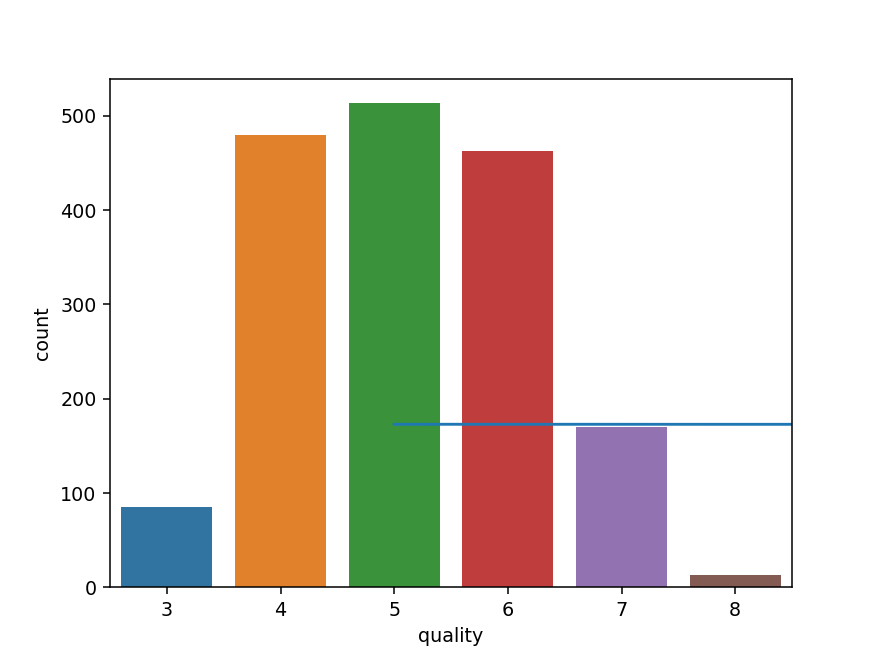

In [190]:
plt.plot(itera , fc)

In [191]:
q = pd.DataFrame(softmax(final_theta0 , final_theta , train_features)) # 1199 * 6 [six decision boundaries]
q.columns = label_count
q.head() # 0 observation have higest probability of belonging from 5th class. 

,3,4,5,6,7,8
0,5.044936e-09,6.978289e-07,6.044307e-01,0.395565,4.899590e-10,3.765433e-06
1,6.610281e-11,1.211734e-08,8.393692e-12,0.998845,6.682899e-35,1.155114e-03
2,8.522653e-14,3.839666e-11,9.681452e-07,0.999998,7.353933e-24,6.828689e-07
3,1.231041e-17,1.182332e-13,4.659861e-07,0.999993,2.828362e-27,6.927846e-06
4,5.044936e-09,6.978289e-07,6.044307e-01,0.395565,4.899590e-10,3.765433e-06


In [193]:
prid_lab = np.argmax(np.array(q) , axis=1)
predicted_label = list(map(lambda i : label_count[i], prid_lab)) # Returns the indices of the maximum values along an axis.
sns.countplot(predicted_label)
plt.show()
sns.countplot(train_labels)
plt.show()

In [195]:
acu = 0  # 3,4, 5, 6, 7,8
for i in range(len(predicted_label)):
    if predicted_label[i] == train_labels[i]:
         acu+=1
    #if predicted_label[i] >= 6:
     #  acu+=1
acu/len(predicted_label)*100

29.774812343619683

# Try to plot this data into 2D 

<IPython.core.display.Javascript object>


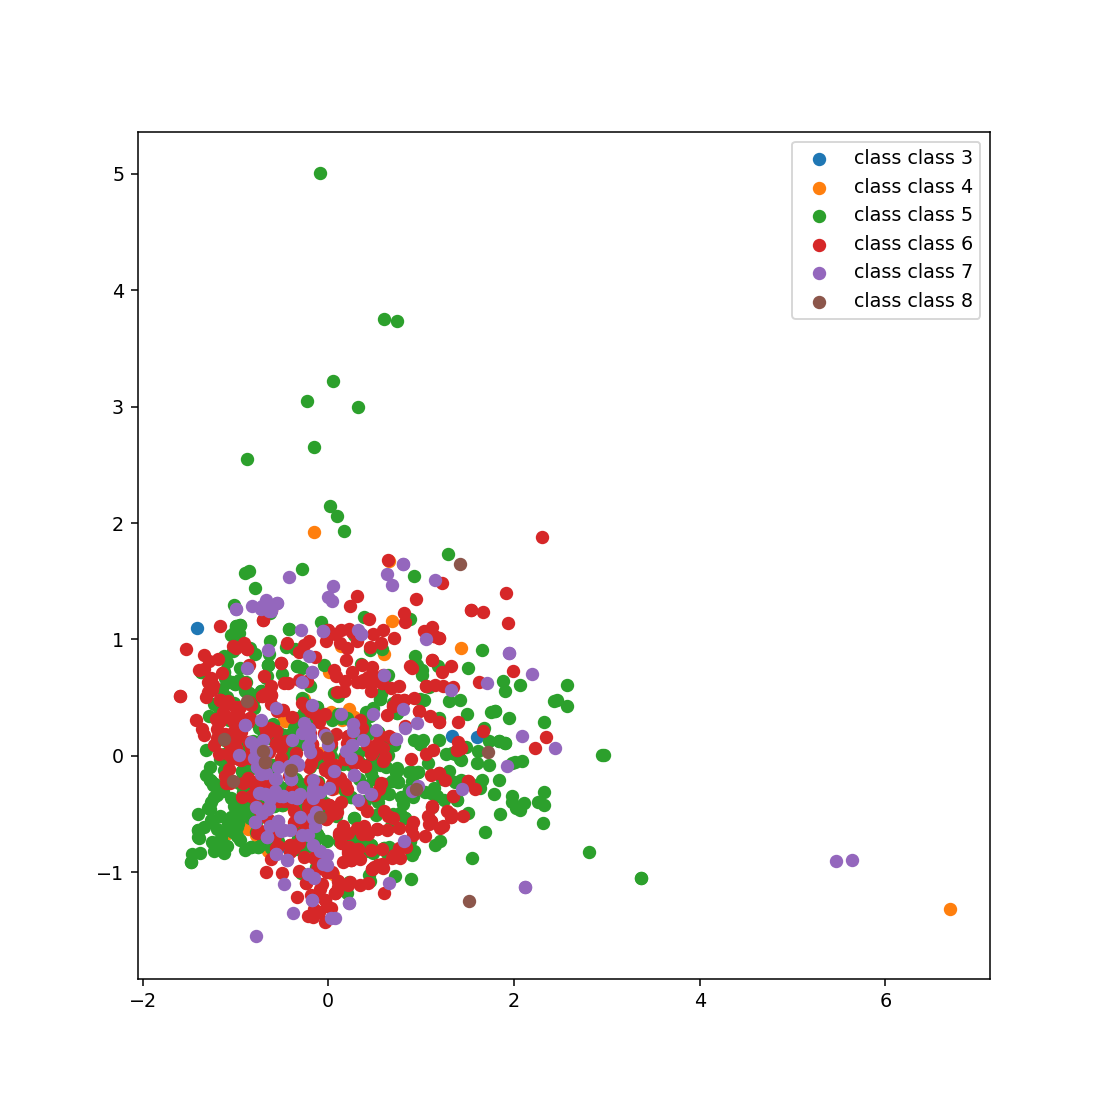

In [196]:
train_data2 = train_data.copy()
train_data2 = train_data2 / np.mean(train_data2 )
train_data2['quality'] = train_labels
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

plt.figure(figsize=(8,8))
xx = []
yy = []
for i in label_count:
    zz = pca.fit_transform(train_data2[train_data2['quality'] == i].iloc[:,:-1])
    xx.append(zz.T[0])
    yy.append(zz.T[1])

xx = np.array(xx)  # 6,    
yy = np.array(yy)  # 6,

for i in range(len(label_count)):
    a = 'class '+ str(i + 3)
    plt.scatter(xx[i],yy[i],label = 'class ' + a)
plt.legend()
plt.show()

# try to plot into 3D

<IPython.core.display.Javascript object>


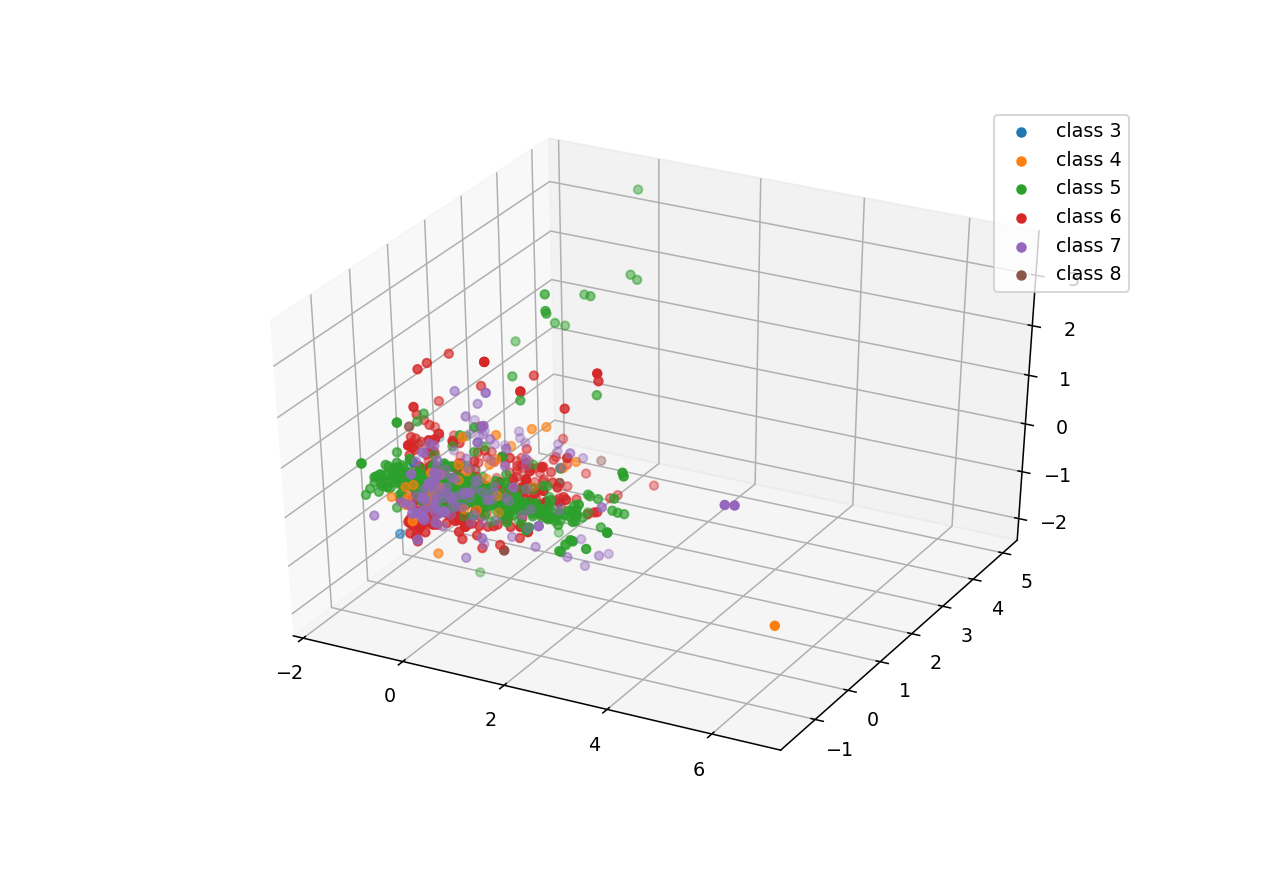

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
xx = []
yy = []
zz = []
for i in label_count:
    t = pca.fit_transform(train_data2[train_data2['quality'] == i].iloc[:,:-1])
    xx.append(t.T[0])
    yy.append(t.T[1])
    zz.append(t.T[2])
xx = np.array(xx)  # 6,    
yy = np.array(yy)  # 6,
zz = np.array(zz)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')
for i in range(len(label_count)):
    a = 'class '+ str(i + 3)
    ax.scatter3D(xx[i],yy[i],zz[i] , label = a)
ax.legend()
plt.show()